In [1]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import date
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn import linear_model
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import combinations
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.api import VAR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import ParameterGrid
import numpy as np
import seaborn as sns
import warnings
from sklearn.pipeline import make_pipeline
from sklearn.kernel_ridge import KernelRidge
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_friedman2
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import SGDRegressor
import statsmodels.api as sm
import itertools
import pmdarima as pm
from sklearn.pipeline import make_pipeline
from pmdarima.arima import auto_arima
from sklearn.kernel_ridge import KernelRidge		
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.ar_model import AutoReg
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from pmdarima.model_selection import train_test_split
from evds import evdsAPI
import pandas as pd
import numpy as np
import requests
import json
from urllib.parse import urlencode
warnings.filterwarnings("ignore")

In [2]:
with open("C:/Users/Bora/Desktop/api.txt") as api:
    key=api.read()



In [3]:
import yfinance as yf 


In [4]:
params = {
    'series': "TP.DK.USD.S.YTL",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

usd = formatted_response['items']
usd = pd.DataFrame(usd)


usd = usd.drop(columns=['UNIXTIME','Tarih'])
usd.columns = ['USD/TL']
usd['USD/TL'] = pd.to_numeric(usd['USD/TL'])
usd=usd.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(usd)))
usd

,USD/TL
2006-01-31,1.334344
2006-02-28,1.326535
2006-03-31,1.335139
2006-04-30,1.337345
2006-05-31,1.420659
...,...
2024-01-31,30.053750
2024-02-29,30.759448
2024-03-31,31.986743
2024-04-30,32.329467


In [668]:
params = {
    'series': "TP.FE.OKTG01",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

enf = formatted_response['items']
enf = pd.DataFrame(enf)


enf = enf.drop(columns=['UNIXTIME','Tarih'])
enf.columns = ['TÜFE']
enf['TÜFE'] = pd.to_numeric(enf['TÜFE'])
enf=enf.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(enf)))
enf

,TÜFE
2006-01-31,123.57
2006-02-28,123.84
2006-03-31,124.18
2006-04-30,125.84
2006-05-31,128.20
...,...
2023-12-31,1859.38
2024-01-31,1984.02
2024-02-29,2073.88
2024-03-31,2139.47


In [6]:
params = {
    'series': "TP.PR.ARZ13",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'last',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

money = formatted_response['items']
money = pd.DataFrame(money)


money = money.drop(columns=['UNIXTIME','Tarih'])
money.columns = ['Para Arzi']
money['Para Arzi'] = pd.to_numeric(money['Para Arzi'])
money=money.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(money)))
money=money.pct_change()*100
money=money.dropna()
money

,Para Arzi
2006-02-28,2.121748
2006-03-31,2.927613
2006-04-30,1.084694
2006-05-31,9.121170
2006-06-30,1.433197
...,...
2024-01-31,0.992308
2024-02-29,1.467195
2024-03-31,2.396667
2024-04-30,1.982216


In [95]:
params = {
    'series': "TP.PR.ARZ22",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 1,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

m3 = formatted_response['items']
m3 = pd.DataFrame(m3)


m3 = m3.drop(columns=['UNIXTIME','YEARWEEK'])
m3.columns = ['Tarih','M3']
m3['M3'] = pd.to_numeric(m3['M3'])
m3 = m3.set_index(pd.to_datetime(m3["Tarih"], format="%d-%m-%Y"))
del m3["Tarih"]
m3=m3.pct_change(4)*100
m3=m3.resample('M').last()
m3=m3.dropna()
m3

,M3
Tarih,
2006-02-28,2.204708
2006-03-31,2.711175
2006-04-30,1.323922
2006-05-31,9.308200
2006-06-30,-0.288618
...,...
2024-01-31,1.119951
2024-02-29,2.359600
2024-03-31,2.687835


In [11]:
params = {
    'series': "TP.TIG08",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'last',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

issizlik = formatted_response['items']
issizlik = pd.DataFrame(issizlik)


issizlik = issizlik.drop(columns=['UNIXTIME','Tarih'])
issizlik.columns = ['İşsizlik']
issizlik['İşsizlik'] = pd.to_numeric(issizlik['İşsizlik'])
issizlik=issizlik.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(issizlik)))
issizlik=issizlik.dropna()
issizlik

,İşsizlik
2014-01-31,9.2
2014-02-28,9.5
2014-03-31,9.5
2014-04-30,9.7
2014-05-31,9.7
...,...
2023-11-30,9.0
2023-12-31,8.8
2024-01-31,9.0
2024-02-29,8.7


In [12]:
import yfinance as yf
df14=yf.download("BZ=F")["Close"]
df14=pd.DataFrame(df14)
df14.columns=["Brent"]
df14=df14.resample('M').mean()
df14

[*********************100%%**********************]  1 of 1 completed


,Brent
Date,
2007-07-31,76.395000
2007-08-31,71.258696
2007-09-30,77.135263
2007-10-31,82.456957
2007-11-30,92.060953
...,...
2024-01-31,79.197143
2024-02-29,81.623999
2024-03-31,84.665499


In [13]:
params = {
    'series': "TP.KREDI.L001",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 1,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

kredi = formatted_response['items']
kredi = pd.DataFrame(kredi)


kredi = kredi.drop(columns=['UNIXTIME','YEARWEEK'])
kredi.columns = ['Tarih','Kredi']
kredi['Kredi'] = pd.to_numeric(kredi['Kredi'])
kredi = kredi.set_index(pd.to_datetime(kredi["Tarih"], format="%d-%m-%Y"))
del kredi["Tarih"]
kredi=kredi.pct_change(4)*100
kredi=kredi.resample('M').last()
kredi=kredi.dropna()
kredi

,Kredi
Tarih,
2006-02-28,1.559036
2006-03-31,5.768193
2006-04-30,3.124932
2006-05-31,8.993162
2006-06-30,3.965727
...,...
2024-01-31,1.789324
2024-02-29,3.130261
2024-03-31,4.108658


In [14]:
params = {
    'series': "TP.APIFON4",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

pfaiz = formatted_response['items']
pfaiz = pd.DataFrame(pfaiz)


pfaiz = pfaiz.drop(columns=['UNIXTIME','Tarih'])
pfaiz.columns = ['Faiz']
pfaiz['Faiz'] = pd.to_numeric(pfaiz['Faiz'])
pfaiz=pfaiz.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(pfaiz)))
pfaiz=pfaiz.dropna()
pfaiz

,Faiz
2011-01-31,6.438571
2011-02-28,6.250000
2011-03-31,6.250000
2011-04-30,6.267619
2011-05-31,6.250000
...,...
2024-01-31,42.703182
2024-02-29,45.239524
2024-03-31,47.287619
2024-04-30,51.357222


In [15]:
motorin=pd.read_excel("./motorin.xlsx")
motorin.columns=["Tarih","Motorin"]
motorin=motorin.set_index(pd.date_range(start="2003-01-01",periods=len(motorin),freq="1M"))
del motorin["Tarih"]
motorin=motorin.astype(float)
motorin

,Motorin
2003-01-31,1.366645
2003-02-28,1.457199
2003-03-31,1.529555
2003-04-30,1.439813
2003-05-31,1.404363
...,...
2023-12-31,36.420000
2024-01-31,39.450000
2024-02-29,42.530000
2024-03-31,41.420000


In [16]:
params = {
    'series': "TP.TRY.MT02",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

mfaiz = formatted_response['items']
mfaiz = pd.DataFrame(mfaiz)


mfaiz = mfaiz.drop(columns=['UNIXTIME','Tarih'])
mfaiz.columns = ['Mevduat Faizi']
mfaiz['Mevduat Faizi'] = pd.to_numeric(mfaiz['Mevduat Faizi'])
mfaiz=mfaiz.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(mfaiz)))
mfaiz=mfaiz.dropna()
mfaiz

,Mevduat Faizi
2006-01-31,15.913333
2006-02-28,15.760000
2006-03-31,15.330000
2006-04-30,15.175000
2006-05-31,14.925000
...,...
2024-01-31,50.482500
2024-02-29,51.460000
2024-03-31,57.272000
2024-04-30,67.567500


In [111]:
params = {
    'series': "TP.BEK.S01.A.S",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

enf_belirsizlik = formatted_response['items']
enf_belirsizlik = pd.DataFrame(enf_belirsizlik)


enf_belirsizlik = enf_belirsizlik.drop(columns=['UNIXTIME','Tarih'])
enf_belirsizlik.columns = ['Enflasyon Belirsizliği']
enf_belirsizlik['Enflasyon Belirsizliği'] = pd.to_numeric(enf_belirsizlik['Enflasyon Belirsizliği'])
enf_belirsizlik=enf_belirsizlik.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(enf_belirsizlik)))
enf_belirsizlik=enf_belirsizlik.dropna()
enf_belirsizlik

,Enflasyon Belirsizliği
2013-01-31,0.32
2013-02-28,0.22
2013-03-31,0.16
2013-04-30,0.26
2013-05-31,0.29
...,...
2024-01-31,1.21
2024-02-29,0.94
2024-03-31,0.64
2024-04-30,0.55


In [18]:
params = {
    'series': "TP.FG.B01.95",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ito = formatted_response['items']
ito = pd.DataFrame(ito)


ito = ito.drop(columns=['UNIXTIME','Tarih'])
ito.columns = ['İTO']
ito['İTO'] = pd.to_numeric(ito['İTO'])
ito=ito.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(ito)))
ito=ito.pct_change()*100
ito=ito.dropna()
ito

,İTO
2006-02-28,1.005528
2006-03-31,0.137253
2006-04-30,2.088936
2006-05-31,1.595826
2006-06-30,-0.100368
...,...
2023-12-31,3.524063
2024-01-31,6.717124
2024-02-29,4.070637
2024-03-31,3.926249


In [19]:
params = {
    'series': "TP.FE.OKTG04",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

tufec = formatted_response['items']
tufec = pd.DataFrame(tufec)


tufec = tufec.drop(columns=['UNIXTIME','Tarih'])
tufec.columns = ['TÜFE C']
tufec['TÜFE C'] = pd.to_numeric(tufec['TÜFE C'])
tufec=tufec.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(tufec)))
tufec=tufec.pct_change()*100
tufec=tufec.shift(1)
tufec=tufec.dropna()
tufec

,TÜFE C
2006-03-31,-1.101304
2006-04-30,-0.368460
2006-05-31,1.857331
2006-06-30,2.622237
2006-07-31,1.344445
...,...
2023-12-31,1.960293
2024-01-31,2.305439
2024-02-29,7.576163
2024-03-31,3.571725


In [20]:
params = {
    'series': "TP.TUFE1YI.T1",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

üfe = formatted_response['items']
üfe = pd.DataFrame(üfe)


üfe = üfe.drop(columns=['UNIXTIME','Tarih'])
üfe.columns = ['ÜFE']
üfe['ÜFE'] = pd.to_numeric(üfe['ÜFE'])
üfe=üfe.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(üfe)))
üfe=üfe.pct_change()*100
üfe=üfe.dropna()
üfe

,ÜFE
2006-02-28,0.256616
2006-03-31,0.247960
2006-04-30,1.938881
2006-05-31,2.770820
2006-06-30,4.021325
...,...
2023-12-31,1.144328
2024-01-31,4.136164
2024-02-29,3.737000
2024-03-31,3.294983


In [21]:
params = {
    'series': "TP.IHRISICREV4.TT",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ihracat = formatted_response['items']
ihracat = pd.DataFrame(ihracat)


ihracat = ihracat.drop(columns=['UNIXTIME','Tarih'])
ihracat.columns = ['ÜFE']
ihracat['ÜFE'] = pd.to_numeric(ihracat['ÜFE'])
ihracat=ihracat.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(ihracat)))
ihracat=ihracat.shift(1)
ihracat=ihracat.dropna()
ihracat=ihracat.pct_change()*100
ihracat

,ÜFE
2013-02-28,NaN
2013-03-31,7.272509
2013-04-30,6.926004
2013-05-31,-4.381315
2013-06-30,5.141469
...,...
2023-11-30,1.702457
2023-12-31,0.693333
2024-01-31,0.043298
2024-02-29,-13.040355


In [22]:
params = {
    'series': "TP.ITHISICREV4.TT",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ithalat = formatted_response['items']
ithalat = pd.DataFrame(ithalat)


ithalat = ithalat.drop(columns=['UNIXTIME','Tarih'])
ithalat.columns = ['ÜFE']
ithalat['ÜFE'] = pd.to_numeric(ithalat['ÜFE'])
ithalat=ithalat.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(ithalat)))
ithalat=ithalat.shift(1)
ithalat=ithalat.dropna()
ithalat=ithalat.pct_change()*100
ithalat

,ÜFE
2013-02-28,NaN
2013-03-31,3.993020
2013-04-30,4.802567
2013-05-31,11.093906
2013-06-30,0.635134
...,...
2023-11-30,6.872405
2023-12-31,-1.607293
2024-01-31,0.412035
2024-02-29,-9.830408


In [23]:
params = {
    'series': "TP.PKAUO.S01.A.U",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

anket = formatted_response['items']
anket = pd.DataFrame(anket)


anket = anket.drop(columns=['UNIXTIME','Tarih'])
anket.columns = ['ÜFE']
anket['ÜFE'] = pd.to_numeric(anket['ÜFE'])
anket=anket.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(anket)))
anket=anket.dropna()

anket

,ÜFE
2013-01-31,0.85
2013-02-28,0.53
2013-03-31,0.48
2013-04-30,0.65
2013-05-31,0.46
...,...
2024-01-31,5.41
2024-02-29,3.80
2024-03-31,3.43
2024-04-30,3.25


In [96]:
data=pd.DataFrame()
data["USD/TL"]=usd["USD/TL"].rolling(3).mean()
data["Motorin"]=motorin["Motorin"]
data["TÜFE"]=enf["TÜFE"]
data["TÜFEt-1"]=data["TÜFE"].shift(1)
data=data.pct_change()*100
data["M3"]=m3["M3"].shift(1)
data["ÜFEt1"]=üfe["ÜFE"]
data["ÜFEt2"]=üfe["ÜFE"].shift(1)
data["TÜFECt1"]=tufec["TÜFE C"]
data["TÜFECt2"]=tufec["TÜFE C"].shift(1)
data["İTO"]=ito["İTO"]
data["İhracat"]=ihracat["ÜFE"]
data["İthalat"]=ithalat["ÜFE"]
data["Anket"]=anket["ÜFE"]
data

,USD/TL,Motorin,TÜFE,TÜFEt-1,M3,ÜFEt1,ÜFEt2,TÜFECt1,TÜFECt2,İTO,İhracat,İthalat,Anket
2006-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-02-28,NaN,0.000000,0.218500,NaN,NaN,0.256616,NaN,NaN,NaN,1.005528,NaN,NaN,NaN
2006-03-31,NaN,0.975610,0.274548,0.218500,2.204708,0.247960,0.256616,-1.101304,NaN,0.137253,NaN,NaN,NaN
2006-04-30,0.075089,2.898551,1.336769,0.274548,2.711175,1.938881,0.247960,-0.368460,-1.101304,2.088936,NaN,NaN,NaN
2006-05-31,2.353679,4.694836,1.875397,1.336769,1.323922,2.770820,1.938881,1.857331,-0.368460,1.595826,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-31,2.580279,8.319605,6.703310,2.927207,4.417846,4.136164,1.144328,2.305439,1.960293,6.717124,0.043298,0.412035,5.41
2024-02-29,2.418218,7.807351,4.529188,6.703310,1.119951,3.737000,4.136164,7.576163,2.305439,4.070637,-13.040355,-9.830408,3.80
2024-03-31,3.239458,-2.609922,3.162671,4.529188,2.359600,3.294983,3.737000,3.571725,7.576163,3.926249,5.589767,6.389409,3.43
2024-04-30,2.452282,1.038146,3.179759,3.162671,2.687835,3.602753,3.294983,3.524351,3.571725,4.894259,NaN,NaN,3.25


In [97]:

data["Kredi"]=kredi["Kredi"].rolling(3).mean()
data["ParaArzi"]=money["Para Arzi"].shift(1)
data["İşsizlik"]=issizlik["İşsizlik"]
data["Enflasyon Belirsizliği"]=enf_belirsizlik
data["Mevduat Faizi"]=mfaiz["Mevduat Faizi"]
data["Politika Faizi"]=pfaiz["Faiz"]
data["Zam"]=0
data=data[['USD/TL', 'Motorin','M3', 'Enflasyon Belirsizliği','Zam','TÜFEt-1','ParaArzi','Kredi','Anket','İhracat','İthalat','Mevduat Faizi','İşsizlik','Politika Faizi','ÜFEt2','TÜFECt2','ÜFEt1','TÜFECt1','İTO','TÜFE']]
data.iloc[:12,4]=380.46
data.iloc[12:18,4]=403.03
data.iloc[18:24,4]=419.15
data.iloc[24:30,4]=481.55
data.iloc[30:36,4]=503.26
data.iloc[36:42,4]=527.13
data.iloc[42:48,4]=546.48
data.iloc[48:54,4]=576.57
data.iloc[54:60,4]=599.12
data.iloc[60:66,4]=629.96
data.iloc[66:72,4]=658.95
data.iloc[72:78,4]=701.13
data.iloc[78:84,4]=739.79
data.iloc[84:90,4]=773.01
data.iloc[90:96,4]=803.68
data.iloc[96:102,4]=846.00
data.iloc[102:108,4]=891.03
data.iloc[108:114,4]=949.07
data.iloc[114:120,4]=1000.54
data.iloc[120:132,4]=1300.99
data.iloc[132:144,4]=1404.06
data.iloc[144:156,4]=1603.12
data.iloc[156:168,4]=2020.9
data.iloc[168:180,4]=2324.71
data.iloc[180:192,4]=2825.90
data.iloc[192:198,4]=4253.4
data.iloc[198:204,4]=5500.35
data.iloc[204:210,4]=8506.8
data.iloc[210:216,4]=11402.33
data.iloc[216:,4]=17002
data["Zam"]=data["Zam"].pct_change()*100
data=data.fillna(0)
data["İşsizlik"].iloc[-2:]=8.4
data.iloc[-1,-4]=3.29
data.iloc[-1,-3]=3.5621
data.iloc[-1,-5]=3.5243
data.iloc[-1,-6]=3.73
data.iloc[-1,-2]=4.89
data.iloc[-1,-10]=-3.07
data.iloc[-1,-11]=-14.64

data.iloc[-2,-10]=7.14
data.iloc[-2,-11]=7.07
data.iloc[-1,8]=2.34

data=data.loc["2014-01-31":]
data["TÜFE"].loc["2023-05-31"]+=2.88
data["İTO"].loc["2023-05-31"]+=2.88
data=data.dropna()
data["Motorin"].iloc[-1]=-3.51
data

,USD/TL,Motorin,M3,Enflasyon Belirsizliği,Zam,TÜFEt-1,ParaArzi,Kredi,Anket,İhracat,İthalat,Mevduat Faizi,İşsizlik,Politika Faizi,ÜFEt2,TÜFECt2,ÜFEt1,TÜFECt1,İTO,TÜFE
2014-01-31,3.732429,2.881984,3.413428,0.37,5.265777,0.460607,3.375162,2.886648,1.06,-7.844611,7.652883,9.0220,9.2,7.503636,1.106494,0.625859,3.319203,-0.111246,0.333618,1.978080
2014-02-28,3.033477,1.685899,1.958423,0.31,0.000000,1.978080,1.804994,2.214819,0.69,-6.175956,-14.641565,10.6275,9.5,10.070500,3.319203,-0.111246,1.383675,0.308798,1.009554,0.428192
2014-03-31,2.465778,-2.278097,0.229599,0.16,0.000000,0.428192,0.451349,1.160171,0.65,4.991889,-6.505852,11.3125,9.5,10.200952,1.383675,0.308798,0.736212,0.701489,0.989257,1.125608
2014-04-30,-1.344724,-6.214384,0.730196,0.23,0.000000,1.125608,0.796760,0.126575,0.76,12.575902,13.043316,11.0200,9.7,10.046190,0.736212,0.701489,0.085477,1.197755,2.649799,1.344970
2014-05-31,-1.859714,-0.561578,-0.093468,0.26,0.000000,1.344970,-0.362357,0.464970,0.63,-7.919312,0.662228,10.4940,9.7,9.891000,0.085477,1.197755,-0.520967,2.119546,0.211698,0.395224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-31,2.580279,8.319605,4.417846,1.21,49.109875,2.927207,4.333376,2.531626,5.41,0.043298,0.412035,50.4825,9.0,42.703182,1.144328,1.960293,4.136164,2.305439,6.717124,6.703310
2024-02-29,2.418218,7.807351,1.119951,0.94,0.000000,6.703310,0.992308,2.597683,3.80,-13.040355,-9.830408,51.4600,8.7,45.239524,4.136164,2.305439,3.737000,7.576163,4.070637,4.529188
2024-03-31,3.239458,-2.609922,2.359600,0.64,0.000000,4.529188,1.467195,3.009414,3.43,5.589767,6.389409,57.2720,8.6,47.287619,3.737000,7.576163,3.294983,3.571725,3.926249,3.162671
2024-04-30,2.452282,1.038146,2.687835,0.55,0.000000,3.162671,2.396667,3.023668,3.25,7.070000,7.140000,67.5675,8.4,51.357222,3.294983,3.571725,3.602753,3.524351,4.894259,3.179759


## Cari Ay Enflasyon Tahmini

In [98]:
features=['USD/TL', 'Motorin', 'Zam', 'ParaArzi', 'Kredi', 'Anket','İhracat',
       'İşsizlik', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1','TÜFE']
data1=data[features]
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data

,USD/TL,Motorin,Zam,ParaArzi,Kredi,Anket,İhracat,İşsizlik,ÜFEt2,TÜFECt2,ÜFEt1,TÜFECt1,TÜFE
0,0.430855,0.117392,0.251590,0.385889,0.651247,-0.347625,-0.686965,-1.246921,-0.384173,-0.527208,0.352115,-0.881444,0.044998
1,0.222051,-0.043939,-0.294454,-0.181363,0.192527,-0.623921,-0.557774,-1.047008,0.357529,-0.871948,-0.296860,-0.685323,-0.641459
2,0.052457,-0.578610,-0.294454,-0.670392,-0.527580,-0.653791,0.306863,-1.047008,-0.291262,-0.675495,-0.513952,-0.501974,-0.332568
3,-1.085888,-1.109545,-0.294454,-0.545606,-1.233313,-0.571649,0.894033,-0.913733,-0.508292,-0.491836,-0.732141,-0.270264,-0.235411
4,-1.239736,-0.347083,-0.294454,-0.964358,-1.002259,-0.668726,-0.692748,-0.913733,-0.726419,-0.259735,-0.935479,0.160125,-0.656061
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,0.086663,0.850829,4.798079,0.732061,0.408841,2.900719,-0.076267,-1.380196,-0.371491,0.096900,0.626039,0.246920,2.137840
121,0.038249,0.781735,-0.294454,-0.474961,0.453944,1.698458,-1.089230,-1.580108,0.631376,0.258323,0.492201,2.707852,1.174904
122,0.283585,-0.623368,-0.294454,-0.303399,0.735071,1.422162,0.353152,-1.646746,0.497576,2.723414,0.343994,0.838156,0.569663
123,0.048425,-0.131309,-0.294454,0.032390,0.744804,1.287748,0.467755,-1.780021,0.349411,0.850559,0.447189,0.816037,0.577232


In [470]:
from sklearn.model_selection import train_test_split
X=scaled_data
X=X.iloc[:,:-1]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-7,:],X.iloc[-7:-1,:]
y_train,y_test=y[:-7],y[-7:-1]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)


In [27]:
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,GRU,SimpleRNN
import keras
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2,l1
def weighted_mse(y_true, y_pred):
    n = len(y_true)
    weights = 1 / np.arange(1, n + 1)  # Ters orantılı ağırlıklar
    weights = weights[::-1]  # Ağırlıkları ters çevir (küçükten büyüğe)
    mse = np.sum(weights * (y_true - y_pred) ** 2) / n
    return mse
def objective(trial):
    # Define hyperparameters to be optimized
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1)
    units1 = trial.suggest_int('units1', 1, 256)
    batch_size = trial.suggest_int('batch_size', 2, 64)
    activation1 = trial.suggest_categorical('activation1', ['tanh','selu','relu','linear'])
    optimizer = trial.suggest_categorical('optimizer', ['adam'])
    rlrate=trial.suggest_float('rlrate',0.001,0.999)
    keras.utils.set_random_seed(42)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=units1,activation=activation1,input_dim=(X_train.shape[1]),kernel_regularizer=l2(rlrate)))
    model.add(Dense(units=1))

    if optimizer == 'adam':
       optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
       optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer == 'SGD':
       optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) 

    

    

    

    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])

    # Train model
    model.fit(X_train, y_train, epochs=1000, batch_size=batch_size,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))

    # Evaluate model
    y_pred = model.predict(X_test)
    tahminler=pd.DataFrame(scaler2.inverse_transform(y_test))
    tahminler.columns=["TÜFE"]
    tahminler["Tahmin"]=scaler2.inverse_transform(y_pred)
    tahminler=tahminler.set_index(data.index[-7:-1])
    tahminler.loc["2024-01-31"]=6.70
    max=abs(tahminler["TÜFE"]-tahminler["Tahmin"]).max()
    mse=mean_squared_error(tahminler["TÜFE"],tahminler["Tahmin"])


    return mse # Return validation accuracy as the objective

In [ ]:
study = optuna.create_study(direction='minimize')  # or 'minimize' depending on your objective
study.optimize(objective, n_trials=2000)  # You can adjust the number of trials

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)

In [209]:
study.best_params

{'learning_rate': 0.009377039965970141,
 'units1': 43,
 'batch_size': 7,
 'activation1': 'tanh',
 'optimizer': 'adam',
 'rlrate': 0.2788740756825726}

In [29]:
from sklearn.model_selection import train_test_split

In [99]:
features=['USD/TL', 'Motorin', 'Zam', 'ParaArzi', 'Kredi', 'Anket','İhracat',
       'İşsizlik', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1','TÜFE']
data1=data[features]
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
X=scaled_data
X=X.iloc[:,:-1]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-7,:],X.iloc[-7:,:]
y_train,y_test=y[:-7],y[-7:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=43,activation="tanh",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.2788740756825726)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.009377039965970141)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=7,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
tahminler=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler.columns=["TÜFE"]
tahminler["NN1"]=scaler2.inverse_transform(y_pred)
tahminler=tahminler.set_index(data.index[-7:])

Epoch 1/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 4.9609 - mean_squared_error: 0.7581 - val_loss: 1.8686 - val_mean_squared_error: 0.1277
Epoch 2/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.5552 - mean_squared_error: 0.2316 - val_loss: 0.6110 - val_mean_squared_error: 0.1243
Epoch 3/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6037 - mean_squared_error: 0.2142 - val_loss: 0.2450 - val_mean_squared_error: 0.0652
Epoch 4/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3647 - mean_squared_error: 0.2045 - val_loss: 0.1522 - val_mean_squared_error: 0.0647
Epoch 5/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2291 - mean_squared_error: 0.1453 - val_loss: 0.1672 - val_mean_squared_error: 0.0989
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


In [100]:
tahminler

,TÜFE,NN1
2023-11-30,3.281097,3.153061
2023-12-31,2.927207,2.336646
2024-01-31,6.703310,6.661178
2024-02-29,4.529188,4.349648
2024-03-31,3.162671,2.816835
2024-04-30,3.179759,3.371817
2024-05-31,0.000000,2.421867


In [32]:
features=['USD/TL', 'Motorin', 'Zam', 'ParaArzi', 'Kredi', 'Anket','İhracat',
       'İşsizlik', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1','TÜFE']
data1=data[features]
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
X=scaled_data
X=X.iloc[:,:-1]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-13,:],X.iloc[-13:,:]
y_train,y_test=y[:-13],y[-13:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=32,activation="tanh",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.17424279013407418)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.014212504541816193)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=7,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
tahminler2=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler2.columns=["TÜFE"]
tahminler2["NN2"]=scaler2.inverse_transform(y_pred)
tahminler2=tahminler2.set_index(data.index[-13:])


Epoch 1/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 3.0922 - mean_squared_error: 0.6807 - val_loss: 1.1365 - val_mean_squared_error: 0.0856
Epoch 2/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0497 - mean_squared_error: 0.2153 - val_loss: 0.4792 - val_mean_squared_error: 0.0901
Epoch 3/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4884 - mean_squared_error: 0.1798 - val_loss: 0.2194 - val_mean_squared_error: 0.0617
Epoch 4/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3282 - mean_squared_error: 0.1909 - val_loss: 0.1672 - val_mean_squared_error: 0.0752
Epoch 5/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2347 - mean_squared_error: 0.1536 - val_loss: 0.1110 - val_mean_squared_error: 0.0527
Epoch 6/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2292 - mean_squared_error: 0.1727 - val_loss: 0.1574 - val_mean_squared_error: 0.0951
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [33]:
tahminler2

,TÜFE,NN2
2023-05-31,2.923076,1.809927
2023-06-30,3.920498,3.983782
2023-07-31,9.488824,8.471335
2023-08-31,9.086793,7.125831
2023-09-30,4.753114,5.114625
2023-10-31,3.433981,3.289810
2023-11-30,3.281097,3.296748
2023-12-31,2.927207,2.232497
2024-01-31,6.703310,6.499166
2024-02-29,4.529188,3.998760


In [34]:
features=['USD/TL', 'Motorin', 'TÜFEt-1', 'ParaArzi', 'Kredi', 'Anket', 
       'İşsizlik', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1','TÜFE']
data1=data[features]
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
X=scaled_data
X=X.iloc[:,:-1]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-25,:],X.iloc[-13:,:]
y_train,y_test=y[:-25],y[-13:]
X_val=X.iloc[-25:-13,:]
y_val=y[-25:-13]
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=29,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.42170876820347847)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0017583324241828712)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=25,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
tahminler3=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler3.columns=["TÜFE"]
tahminler3["NN3"]=scaler2.inverse_transform(y_pred)
tahminler3=tahminler3.set_index(data.index[-13:])


Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 7.2841 - mean_squared_error: 0.7712 - val_loss: 7.4095 - val_mean_squared_error: 1.1056
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.7905 - mean_squared_error: 0.5493 - val_loss: 7.0338 - val_mean_squared_error: 1.0094
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.3850 - mean_squared_error: 0.4241 - val_loss: 6.6797 - val_mean_squared_error: 0.9371
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.0215 - mean_squared_error: 0.3420 - val_loss: 6.3335 - val_mean_squared_error: 0.8700
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.6836 - mean_squared_error: 0.2820 - val_loss: 5.9945 - val_mean_squared_error: 0.8042
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.3663 - mean_squared_error: 0.2362 - val_loss: 5.6677 - val_mean_squared_error: 0.7428
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.0693 - mean_squared_error: 0.2027 - val_loss: 5.3582 - v

In [35]:
tahminler3

,TÜFE,NN3
2023-05-31,2.923076,1.946095
2023-06-30,3.920498,3.668181
2023-07-31,9.488824,7.268389
2023-08-31,9.086793,7.423049
2023-09-30,4.753114,5.207909
2023-10-31,3.433981,3.321920
2023-11-30,3.281097,3.389246
2023-12-31,2.927207,2.409762
2024-01-31,6.703310,4.874037
2024-02-29,4.529188,4.400321


In [36]:
features=['USD/TL', 'Motorin', 'Zam', 'ParaArzi', 'Kredi', 'Anket',
       'İşsizlik', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1','TÜFE']
data1=data[features]
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
X=scaled_data
X=X.iloc[:,:-1]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-13,:],X.iloc[-13:,:]
y_train,y_test=y[:-13],y[-13:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=26,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.1640998114336349)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.021385011088592594)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=5000, batch_size=33,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
tahminler4=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler4.columns=["TÜFE"]
tahminler4["NN4"]=scaler2.inverse_transform(y_pred)
tahminler4=tahminler4.set_index(data.index[-13:])

Epoch 1/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 3.2609 - mean_squared_error: 0.9259 - val_loss: 3.2981 - val_mean_squared_error: 1.2994
Epoch 2/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.4865 - mean_squared_error: 1.7085 - val_loss: 1.6687 - val_mean_squared_error: 0.1493
Epoch 3/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.8045 - mean_squared_error: 0.3396 - val_loss: 1.5758 - val_mean_squared_error: 0.3906
Epoch 4/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.6035 - mean_squared_error: 0.5243 - val_loss: 0.9945 - val_mean_squared_error: 0.0470
Epoch 5/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.0581 - mean_squared_error: 0.1400 - val_loss: 0.9611 - val_mean_squared_error: 0.1881
Epoch 6/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.9522 - mean_squared_error: 0.2362 - val_loss: 0.7405 - val_mean_squared_error: 0.1279
Epoch 7/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7285 - mean_squared_error: 0.1606 - val_loss: 0.5258 - va

In [37]:
tahminler4

,TÜFE,NN4
2023-05-31,2.923076,1.589013
2023-06-30,3.920498,3.874499
2023-07-31,9.488824,8.398936
2023-08-31,9.086793,7.063729
2023-09-30,4.753114,4.759969
2023-10-31,3.433981,3.130774
2023-11-30,3.281097,3.146341
2023-12-31,2.927207,2.210985
2024-01-31,6.703310,6.509257
2024-02-29,4.529188,4.130354


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


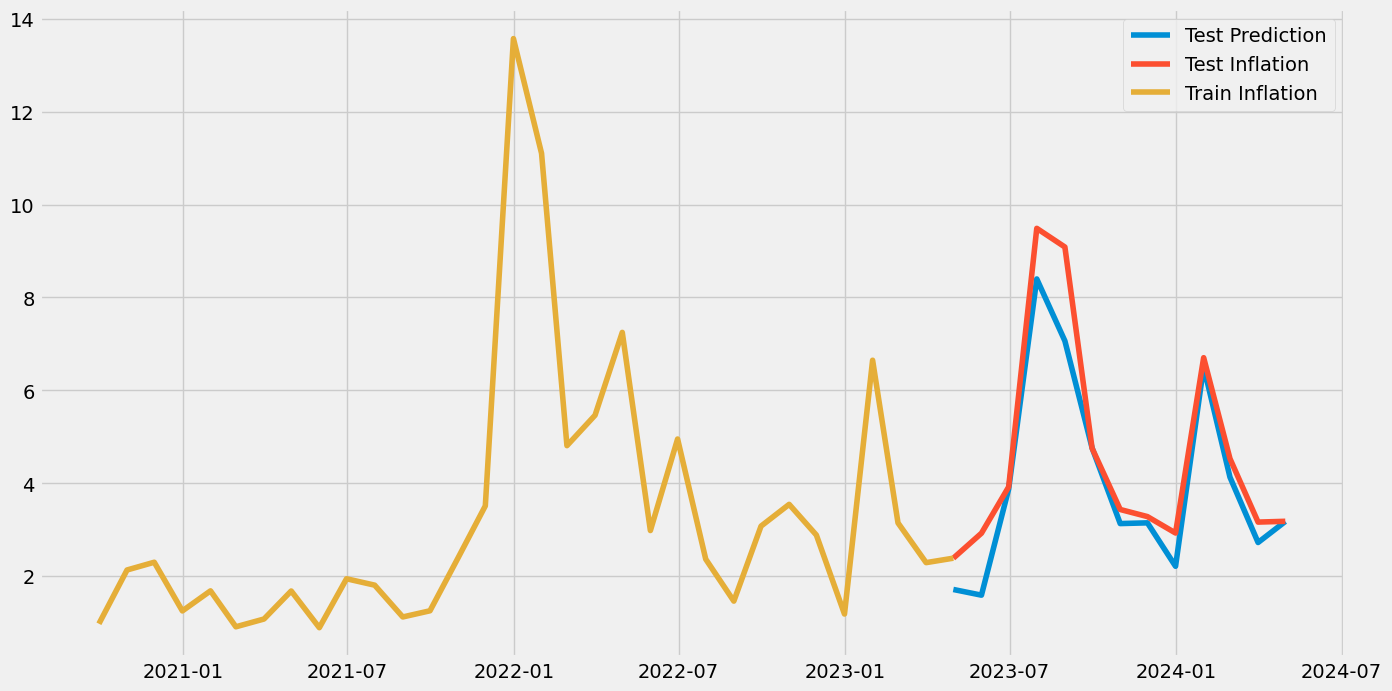

In [38]:
plt.figure(figsize=(15,8))
plt.plot(pd.DataFrame(scaler2.inverse_transform(np.array(model.predict(scaled_data.iloc[-14:-1,:-1])).reshape(-1,1))).set_index(data1.index[-14:-1]),label="Test Prediction")
plt.plot(data["TÜFE"].iloc[-14:-1],label="Test Inflation")
plt.plot(data["TÜFE"].iloc[-45:-13],label="Train Inflation")

plt.legend()

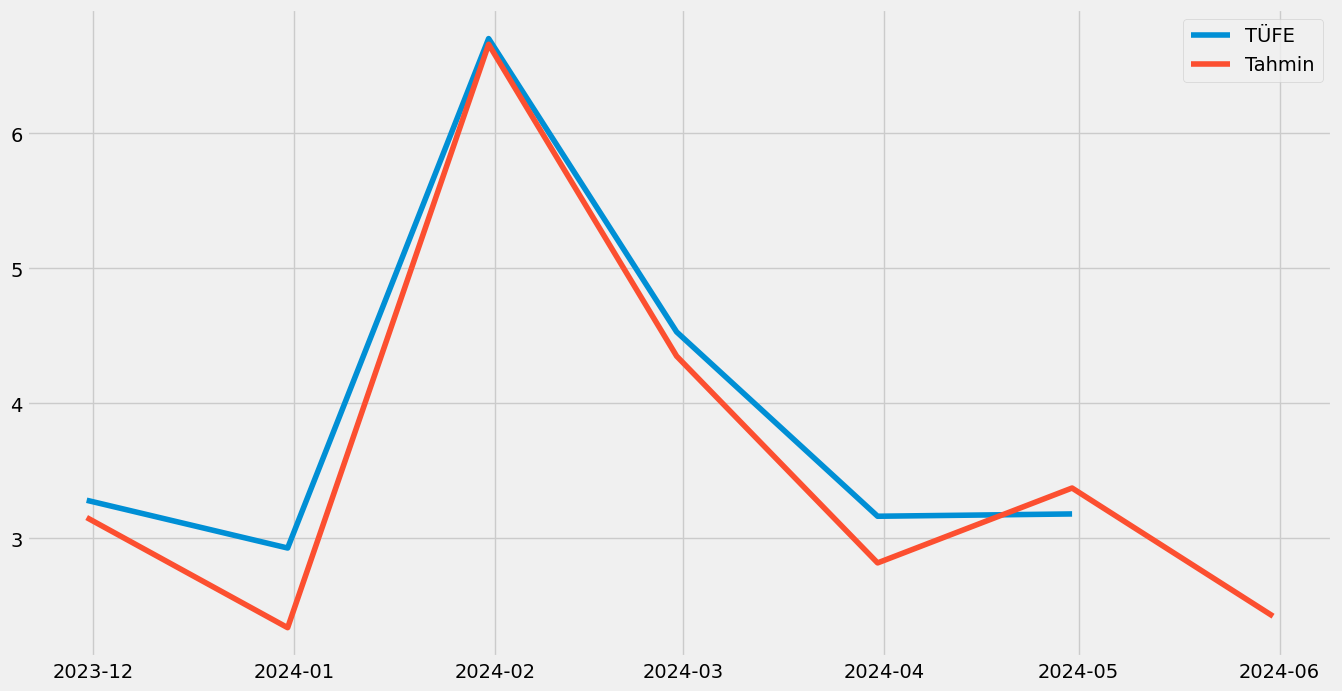

In [39]:
plt.figure(figsize=(15,8))
plt.plot(tahminler["TÜFE"].iloc[:-1],label="TÜFE")
plt.plot(tahminler["NN1"],label="Tahmin")
plt.legend()

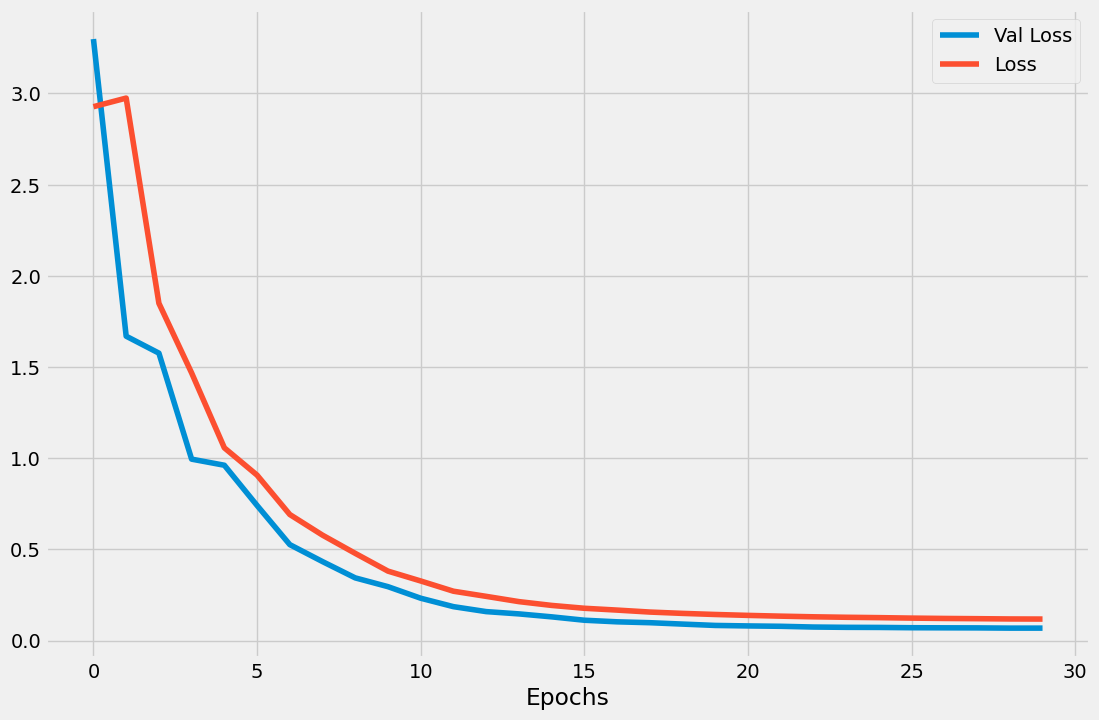

In [40]:
plt.figure(figsize=(12,8))
plt.plot(history.history["val_loss"],label="Val Loss")
plt.plot(history.history["loss"],label="Loss")
plt.xlabel("Epochs")
plt.legend()

In [42]:
kısatahminler=pd.concat([tahminler.iloc[-7:],tahminler2.iloc[-7:,1],tahminler3.iloc[-7:,1],tahminler4.iloc[-7:,1]],axis=1)
kısatahminler["Ortalama"]=kısatahminler.iloc[:,1:].mean(axis=1)
kısatahminler.iloc[-1,1:]+=0.7
kısatahminler

,TÜFE,NN1,NN2,NN3,NN4,Ortalama
2023-11-30,3.281097,3.153061,3.296748,3.389246,3.146341,3.246349
2023-12-31,2.927207,2.336646,2.232497,2.409762,2.210985,2.297472
2024-01-31,6.703310,6.661178,6.499166,4.874037,6.509257,6.135909
2024-02-29,4.529188,4.349648,3.998760,4.400321,4.130354,4.219771
2024-03-31,3.162671,2.816835,2.904717,2.929920,2.723247,2.843680
2024-04-30,3.179759,3.371817,3.231371,3.363678,3.176151,3.285754
2024-05-31,0.000000,3.121867,3.114705,3.402430,3.156384,3.198847


## Orta Vadeli Tahminler

In [43]:
model=auto_arima(pfaiz["Faiz"],seasonal=False,information_criterion="bic")
model_fit = model.fit(pfaiz["Faiz"])
faiztahmin = model_fit.predict(25)
faiztahmin=pd.DataFrame(faiztahmin)
faiztahmin.columns=["Faiz"]
row=pd.DataFrame({"Faiz":pfaiz.iloc[-4:,0]},index=pd.date_range(start="2024-02-28",periods=4,freq="1M"))
faiztahmin=pd.concat([row,faiztahmin],axis=0)

faiztahmin.iloc[4:,0]=[53,53,53,53,53,53,53,53,53,53,50,45,40,35,35,35,35,30,30,30,30,30,25,25,25]
faiztahmin

,Faiz
2024-02-29,45.239524
2024-03-31,47.287619
2024-04-30,51.357222
2024-05-31,50.951818
2024-06-30,53.000000
2024-07-31,53.000000
2024-08-31,53.000000
2024-09-30,53.000000
2024-10-31,53.000000
2024-11-30,53.000000


In [44]:
model=auto_arima(mfaiz["Mevduat Faizi"].loc[pfaiz.index[0]:],X=pfaiz,trace=False,seasonal=False,information_criterion="aic")
mfaiztahmin=pd.DataFrame(model.predict(26,X=faiztahmin[3:]))
mfaiztahmin.columns=["Mevduat Faizi"]
row=pd.DataFrame({"Mevduat Faizi":mfaiz.iloc[-2:,0]},index=pd.date_range(start="2024-04-28",periods=2,freq="1M"))
mfaiztahmin=pd.concat([row,mfaiztahmin],axis=0)
mfaiztahmin


,Mevduat Faizi
2024-04-30,67.567500
2024-05-31,68.105000
2024-06-30,65.537292
2024-07-31,67.836098
2024-08-31,68.826739
2024-09-30,68.370806
2024-10-31,68.489181
2024-11-30,68.972214
2024-12-31,69.080136
2025-01-31,69.185653


In [45]:
trainexog=pd.DataFrame()
trainexog["Dolar"]=usd.iloc[-16:-6,0].rolling(2).mean().dropna()*df14.iloc[:-6,0]
trainexog=trainexog.dropna()
trainexog=np.array(trainexog).reshape(-1,1)
testexog=pd.DataFrame()
testexog["Dolar"]=usd.iloc[-7:,0].rolling(2).mean().dropna()*df14.iloc[-6:,0]
testexog=testexog.dropna()
testexog=np.array(testexog).reshape(-1,1)

In [46]:
exog=pd.DataFrame()
exog["X"]=usd["USD/TL"].rolling(2).mean().dropna()*df14["Brent"]
exog=exog.dropna()
exog
#exog=np.array(exog).reshape(-1,1)


,X
2007-07-31,99.454046
2007-08-31,92.519699
2007-09-30,99.580871
2007-10-31,101.824103
2007-11-30,110.143119
...,...
2024-01-31,2341.408383
2024-02-29,2481.908203
2024-03-31,2656.218779
2024-04-30,2862.071302


In [47]:

zamtahmin=pd.DataFrame()
zamtahmin["Zam"]=[0,0,0,0,0,49.11,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,25]
zamtahmin.columns=["Zam"]
zamtahmin=zamtahmin.set_index(pd.date_range(start="2023-08-30",end="2026-02-27",freq="1M"))
zamtahmin

,Zam
2023-08-31,0.00
2023-09-30,0.00
2023-10-31,0.00
2023-11-30,0.00
2023-12-31,0.00
2024-01-31,49.11
2024-02-29,0.00
2024-03-31,0.00
2024-04-30,0.00
2024-05-31,0.00


In [48]:
faiztahmin.columns=["Faiz"]


In [49]:
exogtrain=pd.DataFrame()
exogtrain["Faiz"]=pfaiz["Faiz"].iloc[95:-13]
exogtrain=np.array(exogtrain).reshape(-1,1)

exogtest=pd.DataFrame()
exogtest=pd.concat([pfaiz["Faiz"].iloc[-14:-3],faiztahmin.iloc[2:,0]],axis=0)
exogtest=np.array(exogtest).reshape(-1,1)



In [50]:
exog=pfaiz["Faiz"].iloc[36:-2]
exog=np.array(exog).reshape(-1,1)

In [51]:
exogtest=faiztahmin.iloc[2:]
exogtest=np.array(exogtest).reshape(-1,1)

In [52]:
model=auto_arima(issizlik,seasonal=True,m=3,X=exog)
model_fit = model.fit(issizlik,X=exog)
issizliktahmin = model_fit.predict(27,X=exogtest)
issizliktahmin=pd.DataFrame(issizliktahmin)
issizliktahmin.columns=["İşsizlik"]
issizliktahmin

,İşsizlik
2024-04-30,8.598479
2024-05-31,8.543401
2024-06-30,8.500024
2024-07-31,8.511738
2024-08-31,8.498071
2024-09-30,8.494321
2024-10-31,8.496972
2024-11-30,8.493879
2024-12-31,8.493031
2025-01-31,8.493631


In [53]:
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [54]:
import optuna


In [55]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"])

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=df6.index
    sn["y"]=df6.values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"])
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(df6.values,predictions["yhat"][:-13])
    return mae_score
try:
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=1000)
    print("Optimize işlemi başarıyla tamamlandı.")
except Exception as e:
    print(f'Hata oluştu: {e}')
    print('Optimize işlemi başarısız oldu. Devam ediyor...')
"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"])\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=df6.index\n    sn["y"]=df6.values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],se

In [56]:
"""study.best_params"""

'study.best_params'

In [57]:
sn=pd.DataFrame()
sn["ds"]=usd.index
sn["y"]=usd.values
prophet=Prophet(growth="linear",changepoint_prior_scale=1.349638369822835,changepoint_range=0.9094193005763949,seasonality_prior_scale=9.159423931839974,n_changepoints=89,interval_width=0.70,yearly_seasonality=False,weekly_seasonality=False)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=26,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

13:34:08 - cmdstanpy - INFO - Chain [1] start processing
13:34:09 - cmdstanpy - INFO - Chain [1] done processing


In [58]:
usdtahmin=(predictions["yhat"][-27:].pct_change(periods=1)*100).dropna()
usdtahmin

ds
2024-06-30    2.379860
2024-07-31    2.402024
2024-08-31    2.345680
2024-09-30    2.217986
2024-10-31    2.242188
2024-11-30    2.122274
2024-12-31    2.147442
2025-01-31    2.102296
2025-02-28    1.859751
2025-03-31    2.021416
2025-04-30    1.917450
2025-05-31    1.944088
2025-06-30    1.845497
2025-07-31    1.872458
2025-08-31    1.838041
2025-09-30    1.746645
2025-10-31    1.773884
2025-11-30    1.686741
2025-12-31    1.714054
2026-01-31    1.685169
2026-02-28    1.496863
2026-03-31    1.632801
2026-04-30    1.554744
2026-05-31    1.581973
2026-06-30    1.507100
2026-07-31    1.534214
Name: yhat, dtype: float64

In [59]:
usdtahmin1 = []
result = usd.iloc[-1,0]
for i in range(len(usdtahmin)):
    result *= (1 + usdtahmin[i] / 100)
    usdtahmin1.append(result)

usdtahmin1 = np.array(usdtahmin1).reshape(-1, 1)
usdtahmin1 = pd.DataFrame(usdtahmin1)
usdtahmin1.columns = ["USD/TL"]
usdtahmin1=pd.concat([usd.iloc[-6:],usdtahmin1],axis=0)
usdtahmin1 = usdtahmin1.set_index(pd.date_range(start="2023-12-30", periods=len(usdtahmin1), freq="1M"))
usdtahmin1

,USD/TL
2023-12-31,29.074857
2024-01-31,30.053750
2024-02-29,30.759448
2024-03-31,31.986743
2024-04-30,32.329467
2024-05-31,32.272708
2024-06-30,33.040754
2024-07-31,33.834401
2024-08-31,34.628048
2024-09-30,35.396093


In [60]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.001,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'growth':trial.suggest_categorical('growth',['linear'])
                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=df14[50:].index
    sn["y"]=df14[50:].values
    prophet=Prophet(**params)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.001,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'growth\':trial.suggest_categorical(\'growth\',[\'linear\'])\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=df14[50:].index\n    sn["y"]=df14[50:].values\n    prophet=Prophet(**params)\n    prophet.fit(sn)\n    future_dates=prophet.make_future_dataframe(periods=13,freq="M")\n    predictions=prophet.predict(future_dates)\n    predictions=predictions.set_index(predictions["ds"])\n    \n    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])\n    return mae_score\nstudy = optuna.create_study(direction=

In [61]:
"""study.best_params"""

'study.best_params'

In [62]:
sn=pd.DataFrame()
sn["ds"]=df14.index
sn["y"]=df14.values
prophet=Prophet(growth="linear",changepoint_prior_scale=9.333547662504625,changepoint_range=0.9362159367416,seasonality_prior_scale=2.378940289163559,n_changepoints=98)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

13:34:09 - cmdstanpy - INFO - Chain [1] start processing
13:34:10 - cmdstanpy - INFO - Chain [1] done processing


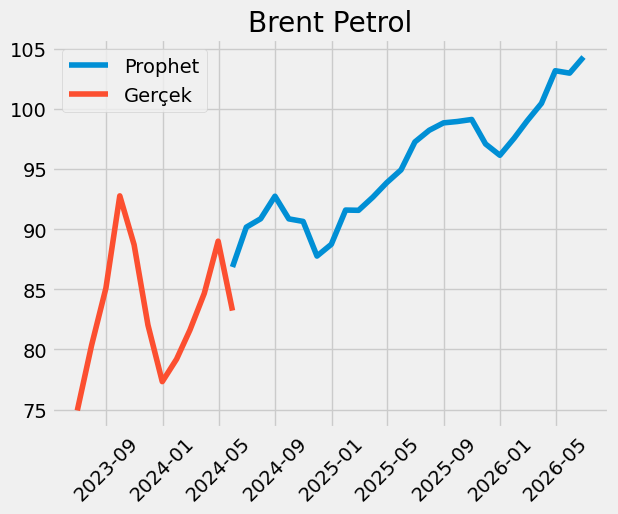

In [63]:
plt.title("Brent Petrol")
plt.plot(predictions["yhat"][-26:],label="Prophet")
plt.plot(df14["Brent"][-12:],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [64]:
brenttahmin=predictions["yhat"][-29:]
brenttahmin

ds
2024-02-29     84.167665
2024-03-31     84.905921
2024-04-30     84.558236
2024-05-31     86.849881
2024-06-30     90.163897
2024-07-31     90.862050
2024-08-31     92.735594
2024-09-30     90.852450
2024-10-31     90.640869
2024-11-30     87.761860
2024-12-31     88.738762
2025-01-31     91.585476
2025-02-28     91.564582
2025-03-31     92.659989
2025-04-30     93.860846
2025-05-31     94.926184
2025-06-30     97.247503
2025-07-31     98.216575
2025-08-31     98.833504
2025-09-30     98.945397
2025-10-31     99.114113
2025-11-30     97.078292
2025-12-31     96.138118
2026-01-31     97.564878
2026-02-28     98.997254
2026-03-31    100.453008
2026-04-30    103.165744
2026-05-31    102.966288
2026-06-30    104.304858
Name: yhat, dtype: float64

In [116]:
enf_belirsizlik

,Enflasyon Belirsizliği
2013-01-31,0.32
2013-02-28,0.22
2013-03-31,0.16
2013-04-30,0.26
2013-05-31,0.29
...,...
2024-01-31,1.21
2024-02-29,0.94
2024-03-31,0.64
2024-04-30,0.55


In [148]:
import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.001,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,50),
                'growth':trial.suggest_categorical('growth',['linear'])

            

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=enf_belirsizlik.index
    sn["y"]=enf_belirsizlik.values
    prophet=Prophet(**params)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)

[I 2024-05-17 13:47:38,471] A new study created in memory with name: no-name-980f6b96-f54b-4297-ba8b-2cdbc71bc19f
13:47:38 - cmdstanpy - INFO - Chain [1] start processing
13:47:38 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-05-17 13:47:38,847] Trial 0 finished with value: 0.07577653241602346 and parameters: {'changepoint_prior_scale': 5.256059215634633, 'changepoint_range': 0.6191249385629812, 'seasonality_prior_scale': 5.0823051924939815, 'n_changepoints': 29, 'growth': 'linear'}. Best is trial 0 with value: 0.07577653241602346.
13:47:38 - cmdstanpy - INFO - Chain [1] start processing
13:47:39 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-05-17 13:47:39,123] Trial 1 finished with value: 0.0820647530636796 and parameters: {'changepoint_prior_scale': 2.3068718780155932, 'changepoint_range': 0.48173503940752627, 'seasonality_prior_scale': 3.132173478485916, 'n_changepoints': 48, 'growth': 'linear'}. Best is trial 0 with value: 0.07577653241602346.
13:47:39 - cmdstanpy

KeyboardInterrupt: 

In [149]:
study.best_params

{'changepoint_prior_scale': 9.585380197030032,
 'changepoint_range': 0.9731698733646258,
 'seasonality_prior_scale': 7.5404114048661555,
 'n_changepoints': 50,
 'growth': 'linear'}

In [163]:
usdtahmin1

,USD/TL
2023-12-31,29.074857
2024-01-31,30.053750
2024-02-29,30.759448
2024-03-31,31.986743
2024-04-30,32.329467
2024-05-31,32.272708
2024-06-30,33.040754
2024-07-31,33.834401
2024-08-31,34.628048
2024-09-30,35.396093


In [173]:
usdtahmin1.pct_change().iloc[5:17]

,USD/TL
2024-05-31,-0.001756
2024-06-30,0.023799
2024-07-31,0.024020
2024-08-31,0.023457
2024-09-30,0.022180
2024-10-31,0.022422
2024-11-30,0.021223
2024-12-31,0.021474
2025-01-31,0.021023
2025-02-28,0.018598


15:18:39 - cmdstanpy - INFO - Chain [1] start processing
15:18:39 - cmdstanpy - INFO - Chain [1] done processing


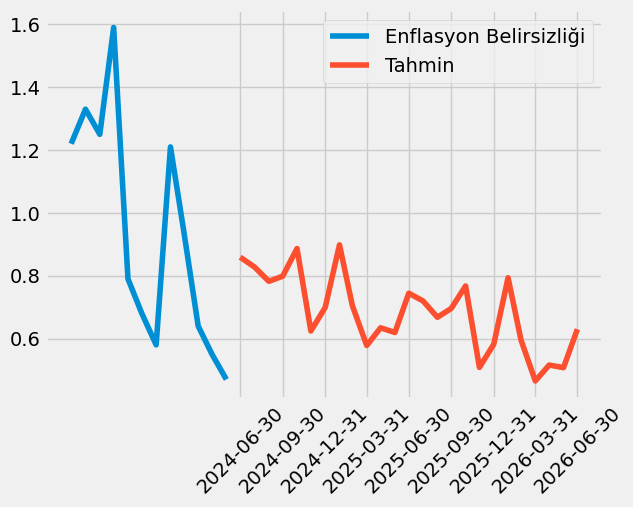

In [566]:
sn=pd.DataFrame()
sn["ds"]=enf_belirsizlik.index
sn["y"]=enf_belirsizlik.values
prophet=Prophet(changepoint_prior_scale=1.7,changepoint_range=0.91,seasonality_prior_scale=0.1053403857042852,n_changepoints=44,growth="linear")
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])
plt.plot(enf_belirsizlik[-12:],label="Enflasyon Belirsizliği")
plt.plot(predictions["yhat"][-25:],label="Tahmin")
plt.xticks(predictions.index[-25::3],rotation=45)
plt.legend()

In [567]:
enfbelirsizliktahmin1=pd.DataFrame(predictions["yhat"][-26:])
enfbelirsizliktahmin1.columns=["Enflasyon Belirsizliği"]
enfbelirsizliktahmin1.index.names=[""]
enfbelirsizliktahmin1.iloc[0,0]=enf_belirsizlik.iloc[-1,0]
enfbelirsizliktahmin1

,Enflasyon Belirsizliği
,
2024-05-31,0.470000
2024-06-30,0.859019
2024-07-31,0.827703
2024-08-31,0.782257
2024-09-30,0.798574
2024-10-31,0.886604
2024-11-30,0.624219
2024-12-31,0.698910
2025-01-31,0.898333


In [69]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',[0.01,10]),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'm':trial.suggest_int('m',0,110),
                'cap':trial.suggest_float('cap',0,200)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][params["m"]:-12].index
    sn["y"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][params["m"]:-12].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][-12:],predictions["yhat"].tail(12))
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',[0.01,10]),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'m\':trial.suggest_int(\'m\',0,110),\n                \'cap\':trial.suggest_float(\'cap\',0,200)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][p

In [70]:
#study.best_params

In [71]:
((usdtahmin1[2:-2].pct_change(periods=1)*100).dropna())

,USD/TL
2024-03-31,3.989978
2024-04-30,1.071456
2024-05-31,-0.175562
2024-06-30,2.379860
2024-07-31,2.402024
2024-08-31,2.345680
2024-09-30,2.217986
2024-10-31,2.242188
2024-11-30,2.122274
2024-12-31,2.147442


In [72]:
brenttahmin1=(brenttahmin.pct_change()*100).dropna()
brenttahmin1

ds
2024-03-31    0.877125
2024-04-30   -0.409494
2024-05-31    2.710139
2024-06-30    3.815798
2024-07-31    0.774315
2024-08-31    2.061966
2024-09-30   -2.030660
2024-10-31   -0.232884
2024-11-30   -3.176281
2024-12-31    1.113128
2025-01-31    3.207971
2025-02-28   -0.022813
2025-03-31    1.196321
2025-04-30    1.295982
2025-05-31    1.135019
2025-06-30    2.445393
2025-07-31    0.996501
2025-08-31    0.628131
2025-09-30    0.113213
2025-10-31    0.170515
2025-11-30   -2.054018
2025-12-31   -0.968469
2026-01-31    1.484073
2026-02-28    1.468127
2026-03-31    1.470499
2026-04-30    2.700502
2026-05-31   -0.193335
2026-06-30    1.300008
Name: yhat, dtype: float64

In [73]:
motorintahmin=pd.DataFrame((1+(((usdtahmin1[2:-2].pct_change(periods=1)*100).dropna())/100)).values*(1+(((brenttahmin1[:-1]).dropna())/100)).values.reshape(-1,1))
motorintahmin.columns=["Motorin"]
motorintahmin=motorintahmin.set_index(pd.date_range(start="2024-02-28",periods=len(motorintahmin),freq="1M"))
motorintahmin.iloc[0,0]=(motorin.pct_change(periods=1)*100).iloc[-1,0]
motorintahmin[1:]=((motorintahmin[1:])-1)*100
motorintahmin

,Motorin
2024-02-29,1.038146
2024-03-31,0.657574
2024-04-30,2.529819
2024-05-31,6.286469
2024-06-30,3.194939
2024-07-31,4.456013
2024-08-31,0.142287
2024-09-30,2.004083
2024-10-31,-1.121417
2024-11-30,3.284473


In [74]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=money["Para Arzi"].index
    sn["y"]=money["Para Arzi"].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(money["Para Arzi"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=money["Para Arzi"].index\n    sn["y"]=money["Para Arzi"].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_rang

In [75]:
"""study.best_params"""

'study.best_params'

In [405]:
sn=pd.DataFrame()
sn["ds"]=money["Para Arzi"].index
sn["y"]=money["Para Arzi"].values
prophet=Prophet(changepoint_prior_scale=1.5034897796889,changepoint_range=0.8529543315216538,growth='linear',seasonality_prior_scale=2.453031163229546,n_changepoints=10,yearly_seasonality="auto",weekly_seasonality=True)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

14:23:53 - cmdstanpy - INFO - Chain [1] start processing
14:23:53 - cmdstanpy - INFO - Chain [1] done processing


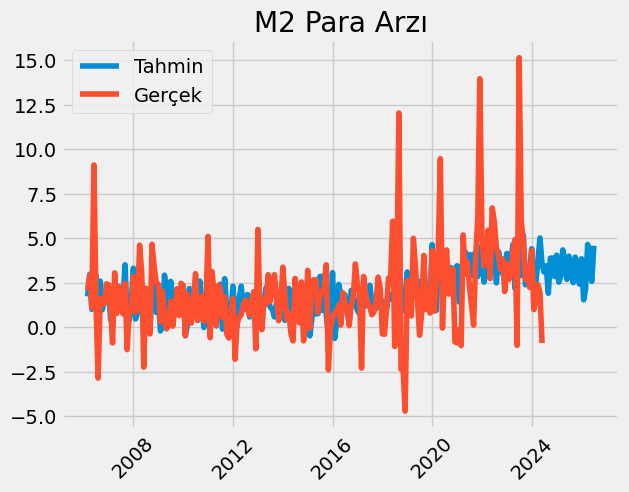

In [406]:
plt.title("M2 Para Arzı")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(money["Para Arzi"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [407]:
paraarzitahmin=(predictions["yhat"]).tail(25)
paraarzitahmin

ds
2024-06-30    3.107357
2024-07-31    3.459853
2024-08-31    1.914427
2024-09-30    3.882705
2024-10-31    3.894444
2024-11-30    2.856648
2024-12-31    4.051567
2025-01-31    2.537809
2025-02-28    2.840024
2025-03-31    4.347178
2025-04-30    3.757103
2025-05-31    2.693479
2025-06-30    3.997061
2025-07-31    3.283997
2025-08-31    2.513238
2025-09-30    3.944514
2025-10-31    3.487804
2025-11-30    2.432145
2025-12-31    3.850630
2026-01-31    1.543341
2026-02-28    2.117045
2026-03-31    4.652985
2026-04-30    3.280639
2026-05-31    2.580716
2026-06-30    4.580477
Name: yhat, dtype: float64

In [408]:
paraarzitahmin1 = paraarzitahmin
paraarzitahmin1 = np.array(paraarzitahmin1).reshape(-1, 1)
paraarzitahmin1 = pd.DataFrame(paraarzitahmin1)
paraarzitahmin1.columns = ["Para Arzi"]
paraarzitahmin1 = paraarzitahmin1.set_index(pd.date_range(start="2024-06-30", periods=len(paraarzitahmin), freq="1M"))
row=pd.DataFrame({"Para Arzi":money.iloc[-4:,0]},index=pd.date_range(start="2024-02-28",periods=4,freq="M"))
paraarzitahmin1=pd.concat([row,paraarzitahmin1])
paraarzitahmin1

,Para Arzi
2024-02-29,1.467195
2024-03-31,2.396667
2024-04-30,1.982216
2024-05-31,-0.881647
2024-06-30,3.107357
2024-07-31,3.459853
2024-08-31,1.914427
2024-09-30,3.882705
2024-10-31,3.894444
2024-11-30,2.856648


In [80]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'm':trial.suggest_int('m',0,110),
                'cap':trial.suggest_float('cap',0,200)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=borc["Borç"][params["m"]:-12].index
    sn["y"]=borc["Borç"][params["m"]:-12].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(borc["Borç"][-12:],predictions["yhat"][-12:])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'m\':trial.suggest_int(\'m\',0,110),\n                \'cap\':trial.suggest_float(\'cap\',0,200)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=borc["Borç"][params["m"]:-12].index\n    sn["y"]=borc["Borç

In [81]:
#study.best_params

In [82]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,5),
                'n_changepoints':trial.suggest_int('n_changepoints',1,200),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),


                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=df3["Kredi"].index
    sn["y"]=df3["Kredi"].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(df3.values,predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,5),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,200),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=df3["Kredi"].index\n    sn["y"]=df3["Kredi"].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=

In [83]:
"""study.best_params"""

'study.best_params'

In [84]:
sn=pd.DataFrame()
sn["ds"]=kredi["Kredi"].index
sn["y"]=kredi["Kredi"].values
prophet=Prophet(changepoint_prior_scale=30.99759561372614,changepoint_range=0.872589785485153,growth="linear",seasonality_prior_scale=3.534157847860739,n_changepoints=189,yearly_seasonality=True,weekly_seasonality=True)

prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

13:34:13 - cmdstanpy - INFO - Chain [1] start processing
13:34:13 - cmdstanpy - INFO - Chain [1] done processing


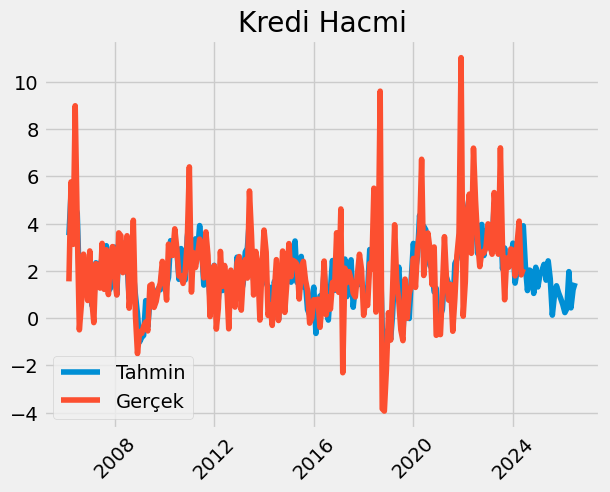

In [85]:
plt.title("Kredi Hacmi")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(kredi["Kredi"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [86]:
kreditahmin=(predictions["yhat"]).tail(25)
kreditahmin

ds
2024-06-30    2.229207
2024-07-31    1.169610
2024-08-31    2.035909
2024-09-30    1.976567
2024-10-31    1.049821
2024-11-30    2.155396
2024-12-31    1.322748
2025-01-31    1.863476
2025-02-28    2.013068
2025-03-31    2.279500
2025-04-30    1.609772
2025-05-31    2.427660
2025-06-30    1.675033
2025-07-31    0.129478
2025-08-31    0.972663
2025-09-30    1.372792
2025-10-31    1.069491
2025-11-30    0.843015
2025-12-31    0.580652
2026-01-31    0.238293
2026-02-28    0.398646
2026-03-31    1.970926
2026-04-30    0.437761
2026-05-31    1.204271
2026-06-30    1.489249
Name: yhat, dtype: float64

In [87]:
kreditahmin1 = kreditahmin

kreditahmin1 = np.array(kreditahmin1).reshape(-1, 1)
kreditahmin1 = pd.DataFrame(kreditahmin1)
kreditahmin1.columns = ["Kredi"]
kreditahmin1 = kreditahmin1.set_index(pd.date_range(start="2024-06-30", periods=len(kreditahmin1), freq="1M"))
row=pd.DataFrame({"Kredi":kredi.iloc[-4:,0]},index=pd.date_range(start="2024-02-28",periods=4,freq="1M"))
kreditahmin1=pd.concat([row,kreditahmin1],axis=0)
kreditahmin1

,Kredi
2024-02-29,3.130261
2024-03-31,4.108658
2024-04-30,1.832087
2024-05-31,2.088004
2024-06-30,2.229207
2024-07-31,1.169610
2024-08-31,2.035909
2024-09-30,1.976567
2024-10-31,1.049821
2024-11-30,2.155396


In [88]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,150),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=m3["M3"].index
    sn["y"]=m3["M3"].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(m3["M3"],predictions["yhat"][:-12])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,150),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=m3["M3"].index\n    sn["y"]=m3["M3"].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["

In [338]:
sn=pd.DataFrame()
sn["ds"]=m3["M3"].index
sn["y"]=m3["M3"].values
prophet=Prophet(changepoint_prior_scale=1.79369153471077,changepoint_range=0.9052396316775,growth='linear',seasonality_prior_scale=6.7636997959024185,n_changepoints=143,yearly_seasonality=True,weekly_seasonality=True)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=13,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

14:19:41 - cmdstanpy - INFO - Chain [1] start processing
14:19:41 - cmdstanpy - INFO - Chain [1] done processing


In [339]:
(predictions["yhat"].tail(13))

ds
2024-06-30    2.365841
2024-07-31    2.717522
2024-08-31    1.452902
2024-09-30    3.000858
2024-10-31    3.472012
2024-11-30    2.345658
2024-12-31    2.378959
2025-01-31    1.005006
2025-02-28    1.534239
2025-03-31    2.989304
2025-04-30    2.380268
2025-05-31    1.837810
2025-06-30    2.414011
Name: yhat, dtype: float64

In [340]:
m3tahmin=(predictions["yhat"].tail(13))


m3tahmin1 = np.array(m3tahmin).reshape(-1, 1)
m3tahmin1 = pd.DataFrame(m3tahmin1)
m3tahmin1.columns = ["M3"]
m3tahmin1 = m3tahmin1.set_index(pd.date_range(start="2024-06-28", periods=len(m3tahmin1), freq="1M"))
row=pd.DataFrame({"M3":m3.iloc[-4:,0]},index=pd.date_range(start="2024-02-28",periods=4,freq="1M"))
m3tahmin1=pd.concat([row,m3tahmin1],axis=0)
m3tahmin1

,M3
2024-02-29,2.359600
2024-03-31,2.687835
2024-04-30,2.405048
2024-05-31,1.047946
2024-06-30,2.365841
2024-07-31,2.717522
2024-08-31,1.452902
2024-09-30,3.000858
2024-10-31,3.472012
2024-11-30,2.345658


In [ ]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'cap':trial.suggest_float('cap',0,400)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=sanayi["Sanayi"].index
    sn["y"]=sanayi["Sanayi"].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=15,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sanayi["Sanayi"],predictions["yhat"][:-15])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=2000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'cap\':trial.suggest_float(\'cap\',0,400)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=sanayi["Sanayi"].index\n    sn["y"]=sanayi["Sanayi"].values\n    sn["cap"]=params["cap"]\n    prophet=Prophet(cha

In [ ]:
#study.best_params

In [ ]:
"""def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,50),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'cap':trial.suggest_int('cap',0,400)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=redkt["REDKT"].index
    sn["y"]=redkt["REDKT"].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=36,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(redkt["REDKT"],predictions["yhat"][:-36])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'def objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,50),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'cap\':trial.suggest_int(\'cap\',0,400)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=redkt["REDKT"].index\n    sn["y"]=redkt["REDKT"].values\n    sn["cap"]=params["cap"]\n    prophet=Prophet(changepoint_prior_scal

In [568]:
import statsmodels.api as sm
tahmindf=pd.DataFrame()
tahmindf=pd.concat([usdtahmin1["USD/TL"].rolling(3).mean()],axis=1)

tahmindf=tahmindf.pct_change(periods=1)*100
tahmindf["M3"]=m3tahmin1.shift(1)
tahmindf["Para Arzi"]=paraarzitahmin1.shift(1)
tahmindf["Enflasyon Belirsizliği"]=enfbelirsizliktahmin1["Enflasyon Belirsizliği"]
tahmindf["Kredi"]=kreditahmin1["Kredi"].rolling(3).mean()
tahmindf["Zam"]=zamtahmin["Zam"]
tahmindf["Motorin"]=motorintahmin["Motorin"]
tahmindf["Mevduat Faizi"]=mfaiztahmin["Mevduat Faizi"]
tahmindf["İşsizlik"]=issizliktahmin
tahmindf["Politika Faizi"]=faiztahmin["Faiz"]




tahmindf=tahmindf[['USD/TL', 'Motorin', 'Zam',
       'Enflasyon Belirsizliği', 'Para Arzi', 'M3', 'Kredi', 'Mevduat Faizi','İşsizlik','Politika Faizi']]

tahmindf.columns=["USD/TL","Motorin","Zam","Enflasyon Belirsizliği",'ParaArzi','M3', 'Kredi', 'Mevduat Faizi','İşsizlik','Politika Faizi']
tahmindf=tahmindf.dropna()
tahmindf.iloc[0,1]=-3.44

tahmindf

,USD/TL,Motorin,Zam,Enflasyon Belirsizliği,ParaArzi,M3,Kredi,Mevduat Faizi,İşsizlik,Politika Faizi
2024-05-31,1.591638,-3.440000,0.0,0.470000,1.982216,2.405048,2.676249,68.105000,8.543401,50.951818
2024-06-30,1.091234,3.194939,0.0,0.859019,-0.881647,1.047946,2.049766,65.537292,8.500024,53.000000
2024-07-31,1.541263,4.456013,0.0,0.827703,3.107357,2.365841,1.828940,67.836098,8.511738,53.000000
2024-08-31,2.375582,0.142287,0.0,0.782257,3.459853,2.717522,1.811575,68.826739,8.498071,53.000000
2024-09-30,2.320458,2.004083,0.0,0.798574,1.914427,1.452902,1.727362,68.370806,8.494321,53.000000
2024-10-31,2.267834,-1.121417,0.0,0.886604,3.882705,3.000858,1.687432,68.489181,8.496972,53.000000
2024-11-30,2.193440,3.284473,0.0,0.624219,3.894444,3.472012,1.727261,68.972214,8.493879,53.000000
2024-12-31,2.169947,5.377709,0.0,0.698910,2.856648,2.345658,1.509322,69.080136,8.493031,53.000000
2025-01-31,2.123861,1.836513,30.0,0.898333,4.051567,2.378959,1.780540,69.185653,8.493631,53.000000
2025-02-28,2.034480,3.241920,0.0,0.704154,2.537809,1.005006,1.733097,69.444543,8.492931,53.000000


In [569]:
data["TÜFE Lag"]=(enf.pct_change()*100).shift(1).dropna()["TÜFE"]
tahmindf["TÜFE Lag"]=0
tahmindf["TÜFE Lag"].iloc[0]=data["TÜFE"].iloc[-2]

In [570]:
data.loc["2023-06-30","TÜFE Lag"]=data.loc["2023-05-31","TÜFE"]

In [571]:
data=data.dropna()

In [572]:
data1=pd.concat([data,tahmindf],axis=0)
data1

,USD/TL,Motorin,M3,Enflasyon Belirsizliği,Zam,TÜFEt-1,ParaArzi,Kredi,Anket,İhracat,...,Mevduat Faizi,İşsizlik,Politika Faizi,ÜFEt2,TÜFECt2,ÜFEt1,TÜFECt1,İTO,TÜFE,TÜFE Lag
2014-01-31,3.732429,2.881984,3.413428,0.370000,5.265777,0.460607,3.375162,2.886648,1.06,-7.844611,...,9.022000,9.200000,7.503636,1.106494,0.625859,3.319203,-0.111246,0.333618,1.978080,0.460607
2014-02-28,3.033477,1.685899,1.958423,0.310000,0.000000,1.978080,1.804994,2.214819,0.69,-6.175956,...,10.627500,9.500000,10.070500,3.319203,-0.111246,1.383675,0.308798,1.009554,0.428192,1.978080
2014-03-31,2.465778,-2.278097,0.229599,0.160000,0.000000,0.428192,0.451349,1.160171,0.65,4.991889,...,11.312500,9.500000,10.200952,1.383675,0.308798,0.736212,0.701489,0.989257,1.125608,0.428192
2014-04-30,-1.344724,-6.214384,0.730196,0.230000,0.000000,1.125608,0.796760,0.126575,0.76,12.575902,...,11.020000,9.700000,10.046190,0.736212,0.701489,0.085477,1.197755,2.649799,1.344970,1.125608
2014-05-31,-1.859714,-0.561578,-0.093468,0.260000,0.000000,1.344970,-0.362357,0.464970,0.63,-7.919312,...,10.494000,9.700000,9.891000,0.085477,1.197755,-0.520967,2.119546,0.211698,0.395224,1.344970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-28,2.034480,3.241920,1.005006,0.704154,0.000000,NaN,2.537809,1.733097,NaN,NaN,...,69.444543,8.492931,53.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2025-03-31,1.993914,3.238282,1.534239,0.578051,0.000000,NaN,2.840024,2.052015,NaN,NaN,...,69.644803,8.492738,53.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2025-04-30,1.933213,3.101173,2.989304,0.634337,0.000000,NaN,4.347178,1.967447,NaN,NaN,...,69.805521,8.532146,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2025-05-31,1.960477,4.336020,2.380268,0.619335,0.000000,NaN,3.757103,2.105644,NaN,NaN,...,68.132970,8.597442,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [573]:
features=['USD/TL','Motorin','M3','Enflasyon Belirsizliği', 'Kredi','İşsizlik','TÜFE']
data1=data1[features]


In [574]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["TÜFE"]=scaler.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data=scaled_data.iloc[1:,:]
scaled_data

,USD/TL,Motorin,M3,Enflasyon Belirsizliği,Kredi,İşsizlik,TÜFE
1,0.241888,-0.056158,-0.135354,-0.615743,0.208570,-0.827521,-0.647369
2,0.063851,-0.616213,-0.829973,-1.008941,-0.547406,-0.827521,-0.338856
3,-1.131162,-1.172354,-0.628840,-0.825449,-1.288292,-0.703260,-0.241817
4,-1.292669,-0.373694,-0.959777,-0.746809,-1.045730,-0.703260,-0.661953
5,-1.206770,0.094139,-1.125144,-0.589530,-0.588680,-0.703260,-0.699304
...,...,...,...,...,...,...,...
133,-0.071408,0.163685,-0.518425,0.417461,-0.136730,-1.453218,NaN
134,-0.084130,0.163171,-0.305786,0.086906,0.091872,-1.453338,NaN
135,-0.103167,0.143799,0.278840,0.234451,0.031253,-1.428853,NaN
136,-0.094616,0.318265,0.034137,0.195125,0.130313,-1.388285,NaN


In [211]:
from sklearn.model_selection import train_test_split
X=scaled_data
X=X.iloc[:-14,:-1]
y=scaled_data["TÜFE"][:-14]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-12,:],X.iloc[-12:,:]
y_train,y_test=y[:-12],y[-12:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.05,random_state=42)


In [ ]:
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,GRU,SimpleRNN
import keras
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2
def objective(trial):
    # Define hyperparameters to be optimized
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1)
    units1 = trial.suggest_int('units1', 1, 128)
    batch_size = trial.suggest_int('batch_size', 2, 64)
    activation1 = trial.suggest_categorical('activation1', ['tanh','selu'])
    optimizer = trial.suggest_categorical('optimizer', ['adam'])
    rlrate=trial.suggest_float('rlrate',0.001,0.999)
    rlrate2=trial.suggest_float('rlrate2',0.001,0.999)
    keras.utils.set_random_seed(42)
    early_stopping = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=units1,activation=activation1,input_dim=(X_train.shape[1]),kernel_regularizer=l2(rlrate)))
    model.add(Dense(units=units1,activation=activation1,input_dim=(X_train.shape[1]),kernel_regularizer=l2(rlrate2)))
    model.add(Dense(units=1))

    if optimizer == 'adam':
       optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
       optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer == 'SGD':
       optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)  

    

    

    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])

    # Train model
    model.fit(X_train, y_train, epochs=1000, batch_size=batch_size,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))

    # Evaluate model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(scaler.inverse_transform(y_test), scaler.inverse_transform(y_pred))

    return mse  # Return validation accuracy as the objective


In [ ]:
"""study = optuna.create_study(direction='minimize')  # or 'minimize' depending on your objective
study.optimize(objective, n_trials=2000)  # You can adjust the number of trials

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)"""

"study = optuna.create_study(direction='minimize')  # or 'minimize' depending on your objective\nstudy.optimize(objective, n_trials=2000)  # You can adjust the number of trials\n\n# Print the best hyperparameters\nprint('Best hyperparameters:', study.best_params)"

In [575]:
from sklearn.model_selection import train_test_split
data1=pd.concat([data,tahmindf],axis=0)
features=['USD/TL','Motorin','M3','Enflasyon Belirsizliği', 'Kredi','İşsizlik','TÜFE']
data1=data1[features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["TÜFE"]=scaler.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data=scaled_data.iloc[1:,:]
X=scaled_data
X=X.iloc[:-15,:-1]
y=scaled_data["TÜFE"][:-15]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X_train,X_test=X[:-12,:],X[-12:,:]
y_train,y_test=y[:-12],y[-12:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.05,random_state=42)

In [576]:
import keras
from keras import Sequential
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout,SimpleRNN
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
from keras.regularizers import l2
keras.utils.set_random_seed(42)
model = Sequential()
model.add(Dense(units=3,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.11064517951376238)))
model.add(Dense(units=3,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.7726924049252087)))
model.add(Dense(1))
optimizer = keras.optimizers.Adam(learning_rate=0.025721829128366083)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=3,verbose=1,validation_data=(X_val,y_val),callbacks=[early_stopping])

Epoch 1/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2.3402 - mean_squared_error: 0.4502 - val_loss: 0.5897 - val_mean_squared_error: 0.1872
Epoch 2/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5729 - mean_squared_error: 0.2571 - val_loss: 0.3953 - val_mean_squared_error: 0.1123
Epoch 3/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4602 - mean_squared_error: 0.1979 - val_loss: 0.3567 - val_mean_squared_error: 0.1079
Epoch 4/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4186 - mean_squared_error: 0.1864 - val_loss: 0.3615 - val_mean_squared_error: 0.0991


In [577]:
pred1=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


In [578]:
mean_squared_error(scaler.inverse_transform(y_test),scaler.inverse_transform(model.predict(X_test)))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


0.8443937688901141

In [579]:
pred=scaler.inverse_transform(model.predict(np.array(scaled_data.iloc[-14:,:-1])))
pred=pd.DataFrame(pred)
pred.columns=["TÜFE"]
pred=pred.set_index(pd.date_range(start="2024-05-28",periods=14,freq="1M"))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


,TÜFE
2024-05-31,1.814508
2024-06-30,3.085796
2024-07-31,3.350472
2024-08-31,3.076656
2024-09-30,3.018772
2024-10-31,3.204833
2024-11-30,3.082950
2024-12-31,3.164661
2025-01-31,3.357447
2025-02-28,2.808603


In [580]:
tüfetahmin1 = []
result = enf["TÜFE"].iloc[-1]
pred=np.array(pred).reshape(1,-1).ravel()
for i in range(len(pred)):
    result *= (1 + (pred[i] / 100))
    tüfetahmin1.append(result)

tüfetahmin1 = np.array(tüfetahmin1).reshape(-1, 1)
tüfetahmin1 = pd.DataFrame(tüfetahmin1)
tüfetahmin1.columns = ["NN"]
tüfetahmin1 = tüfetahmin1.set_index(pd.date_range(start="2024-05-28", periods=len(tüfetahmin1), freq="1M"))
tüfetahmin1

,NN
2024-05-31,2247.555269
2024-06-30,2316.910236
2024-07-31,2394.537664
2024-08-31,2468.209354
2024-09-30,2542.718970
2024-10-31,2624.208867
2024-11-30,2705.111917
2024-12-31,2790.719544
2025-01-31,2884.416471
2025-02-28,2965.428280


In [581]:
data1=pd.concat([data,tahmindf],axis=0)
features=['USD/TL','Motorin','M3', 'Kredi','İşsizlik','TÜFE Lag','TÜFE']
data1=data1[features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["TÜFE"]=scaler.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data=scaled_data.iloc[1:,:]
X=scaled_data
X=X.iloc[:-15,:-1]
y=scaled_data["TÜFE"][:-15]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X_train,X_test=X[:-12,:],X[-12:,:]
y_train,y_test=y[:-12],y[-12:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.05,random_state=42)
import keras
from keras import Sequential
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout,SimpleRNN
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
from keras.regularizers import l2
keras.utils.set_random_seed(42)
model = Sequential()
model.add(Dense(units=3,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.7756667258232616)))
model.add(Dense(units=113,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.22481422283704167)))
model.add(Dense(1))
optimizer = keras.optimizers.RMSprop(learning_rate=0.04592122323666263)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=20, batch_size=60,verbose=1,validation_data=(X_val,y_val))

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 251ms/step - loss: 19.2912 - mean_squared_error: 12.4932 - val_loss: 15.4656 - val_mean_squared_error: 11.8184
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 13.2004 - mean_squared_error: 9.8433 - val_loss: 4.6387 - val_mean_squared_error: 1.8526
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 4.1268 - mean_squared_error: 1.4430 - val_loss: 2.6037 - val_mean_squared_error: 0.2583
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 2.7208 - mean_squared_error: 0.4337 - val_loss: 2.1767 - val_mean_squared_error: 0.2296
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 2.3069 - mean_squared_error: 0.4083 - val_loss: 1.8307 - val_mean_squared_error: 0.2094
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 1.9748 - mean_squared_error: 0.3923 - val_loss: 1.5535 - val_mean_squared_error: 0.1968
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1.7102 - mean_squared_error: 0.3847 - val_loss: 1.3312 - val_mean_s

In [582]:
mean_squared_error(scaler.inverse_transform(y_test),scaler.inverse_transform(model.predict(X_test)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


0.7877495192351051

In [583]:
pred2=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [584]:
pred=scaler.inverse_transform(model.predict(np.array(scaled_data.iloc[-14:,:-1])))
pred=pd.DataFrame(pred)
pred.columns=["TÜFE"]
pred=pred.set_index(pd.date_range(start="2024-05-28",periods=14,freq="1M"))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


,TÜFE
2024-05-31,2.371110
2024-06-30,1.596329
2024-07-31,2.027645
2024-08-31,1.867563
2024-09-30,1.716672
2024-10-31,1.778570
2024-11-30,2.277254
2024-12-31,2.130166
2025-01-31,1.885427
2025-02-28,1.675200


In [585]:
tüfetahmin4 = []
result = enf["TÜFE"].iloc[-1]
pred=np.array(pred).reshape(1,-1).ravel()
for i in range(len(pred)):
    result *= (1 + (pred[i] / 100))
    tüfetahmin4.append(result)

tüfetahmin4 = np.array(tüfetahmin4).reshape(-1, 1)
tüfetahmin4 = pd.DataFrame(tüfetahmin4)
tüfetahmin4.columns = ["NN"]
tüfetahmin4 = tüfetahmin4.set_index(pd.date_range(start="2024-05-28", periods=len(tüfetahmin4), freq="1M"))
tüfetahmin4

,NN
2024-05-31,2259.842247
2024-06-30,2295.916769
2024-07-31,2342.469813
2024-08-31,2386.216905
2024-09-30,2427.180429
2024-10-31,2470.349522
2024-11-30,2526.605646
2024-12-31,2580.426530
2025-01-31,2629.078598
2025-02-28,2673.120928


In [492]:
data1=pd.concat([data,tahmindf],axis=0)
features=['USD/TL','Motorin','M3', 'Kredi','TÜFE Lag','TÜFE']
data1=data1[features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["TÜFE"]=scaler.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data=scaled_data.iloc[1:,:]
X=scaled_data
X=X.iloc[:-15,:-1]
y=scaled_data["TÜFE"][:-15]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X_train,X_test=X[:-12,:],X[-12:,:]
y_train,y_test=y[:-12],y[-12:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.05,random_state=42)
import keras
from keras import Sequential
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout,SimpleRNN
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
from keras.regularizers import l2
keras.utils.set_random_seed(42)
model = Sequential()
model.add(Dense(units=48,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.7094881423211541)))
model.add(Dense(units=77,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.7574422111330262)))
model.add(Dense(1))
optimizer = keras.optimizers.Adam(learning_rate=0.05310522650503496)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=58,verbose=1,validation_data=(X_val,y_val),callbacks=[early_stopping])

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 329ms/step - loss: 55.1192 - mean_squared_error: 8.5708 - val_loss: 21.8782 - val_mean_squared_error: 1.0551
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 19.9508 - mean_squared_error: 1.3748 - val_loss: 11.4265 - val_mean_squared_error: 0.4196
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 11.4410 - mean_squared_error: 0.6082 - val_loss: 10.9304 - val_mean_squared_error: 0.2847
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 11.6760 - mean_squared_error: 0.8712 - val_loss: 11.2712 - val_mean_squared_error: 0.2757


In [493]:
pred3=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


In [494]:
mean_squared_error(scaler.inverse_transform(y_test),scaler.inverse_transform(model.predict(X_test)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


0.7325491785725724

In [495]:
pred=scaler.inverse_transform(model.predict(np.array(scaled_data.iloc[-14:,:-1])))
pred=pd.DataFrame(pred)
pred.columns=["TÜFE"]
pred=pred.set_index(pd.date_range(start="2024-05-28",periods=14,freq="1M"))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


,TÜFE
2024-05-31,2.568176
2024-06-30,1.846226
2024-07-31,2.431426
2024-08-31,2.170567
2024-09-30,1.998225
2024-10-31,2.092454
2024-11-30,2.727953
2024-12-31,2.664609
2025-01-31,2.216939
2025-02-28,1.976120


In [496]:
tüfetahmin3 = []
result = enf["TÜFE"].iloc[-1]
pred=np.array(pred).reshape(1,-1).ravel()
for i in range(len(pred)):
    result *= (1 + (pred[i] / 100))
    tüfetahmin3.append(result)

tüfetahmin3 = np.array(tüfetahmin3).reshape(-1, 1)
tüfetahmin3 = pd.DataFrame(tüfetahmin3)
tüfetahmin3.columns = ["NN"]
tüfetahmin3 = tüfetahmin3.set_index(pd.date_range(start="2024-05-28", periods=len(tüfetahmin3), freq="1M"))
tüfetahmin3

,NN
2024-05-31,2264.192475
2024-06-30,2305.994574
2024-07-31,2362.063127
2024-08-31,2413.333291
2024-09-30,2461.557125
2024-10-31,2513.064074
2024-11-30,2581.619292
2024-12-31,2650.409345
2025-01-31,2709.167315
2025-02-28,2762.703699


In [497]:
data1=pd.concat([data,tahmindf],axis=0)
features=['USD/TL','Motorin','ParaArzi', 'Kredi','İşsizlik','TÜFE Lag','TÜFE']
data1=data1[features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["TÜFE"]=scaler.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data=scaled_data.iloc[1:,:]
X=scaled_data
X=X.iloc[:-15,:-1]
y=scaled_data["TÜFE"][:-15]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X_train,X_test=X[:-12,:],X[-12:,:]
y_train,y_test=y[:-12],y[-12:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.05,random_state=42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
from keras.regularizers import l2
keras.utils.set_random_seed(42)
model = Sequential()
model.add(Dense(units=89,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.05688977475972332)))
model.add(Dense(units=18,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.6706865688008817)))
model.add(Dense(1))
optimizer = keras.optimizers.RMSprop(learning_rate=0.01985884761094969)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=57,verbose=1,validation_data=(X_val,y_val),callbacks=[early_stopping])

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 270ms/step - loss: 25.5918 - mean_squared_error: 7.0446 - val_loss: 12.5069 - val_mean_squared_error: 2.0819
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 11.7047 - mean_squared_error: 2.2879 - val_loss: 6.0855 - val_mean_squared_error: 0.3013
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 5.7533 - mean_squared_error: 0.4028 - val_loss: 3.7491 - val_mean_squared_error: 0.1308
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 3.7475 - mean_squared_error: 0.3553 - val_loss: 2.5913 - val_mean_squared_error: 0.1500
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 2.6658 - mean_squared_error: 0.3675 - val_loss: 1.8875 - val_mean_squared_error: 0.1592
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.0029 - mean_squared_error: 0.3757 - val_loss: 1.4585 - val_mean_squared_error: 0.1784
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1.5695 - mean_squared_error: 0.3700 - val_loss: 1.1591 

In [498]:
pred4=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


In [499]:
mean_squared_error(scaler.inverse_transform(y_test),scaler.inverse_transform(model.predict(X_test)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


0.7299726106873815

In [500]:
tahminler=pd.DataFrame(index=pd.date_range(start="2023-04-28",periods=12,freq="1M"))
tahminler["TÜFE"]=scaler.inverse_transform(y_test)
tahminler["Tahmin"]=scaler.inverse_transform(model.predict(X_test))
tahminler.iloc[1,:]-=2.88
tahminler.iloc[-3,1]=6.83
tahminler

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


,TÜFE,Tahmin
2023-04-30,2.385509,2.817988
2023-05-31,0.043076,-0.373155
2023-06-30,3.920498,4.215082
2023-07-31,9.488824,10.293196
2023-08-31,9.086793,9.024432
2023-09-30,4.753114,6.290515
2023-10-31,3.433981,3.350999
2023-11-30,3.281097,2.848039
2023-12-31,2.927207,2.436332
2024-01-31,6.703310,6.830000


In [501]:
pred=scaler.inverse_transform(model.predict(np.array(scaled_data.iloc[-14:,:-1])))
pred=pd.DataFrame(pred)
pred.columns=["TÜFE"]
pred=pred.set_index(pd.date_range(start="2024-05-28",periods=14,freq="1M"))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


,TÜFE
2024-05-31,2.229185
2024-06-30,0.765388
2024-07-31,2.504761
2024-08-31,2.107450
2024-09-30,1.707283
2024-10-31,2.062689
2024-11-30,2.725898
2024-12-31,2.585869
2025-01-31,2.580259
2025-02-28,2.133062


In [502]:
tüfetahmin2= []
result = enf["TÜFE"].iloc[-1]
pred=np.array(pred).reshape(1,-1).ravel()
for i in range(len(pred)):
    result *= (1 + (pred[i] / 100))
    tüfetahmin2.append(result)

tüfetahmin2 = np.array(tüfetahmin2).reshape(-1, 1)
tüfetahmin2 = pd.DataFrame(tüfetahmin2)
tüfetahmin2.columns = ["NN"]
tüfetahmin2 = tüfetahmin2.set_index(pd.date_range(start="2024-05-28", periods=len(tüfetahmin2), freq="1M"))
tüfetahmin2

,NN
2024-05-31,2256.709261
2024-06-30,2273.981833
2024-07-31,2330.939653
2024-08-31,2380.063047
2024-09-30,2420.697464
2024-10-31,2470.628926
2024-11-30,2537.975740
2024-12-31,2603.604470
2025-01-31,2670.784204
2025-02-28,2727.753697


In [503]:
data1=pd.concat([data,tahmindf],axis=0)
features=['USD/TL','Motorin','ParaArzi', 'Kredi','İşsizlik','TÜFE Lag','TÜFE']
data1=data1[features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["TÜFE"]=scaler.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data=scaled_data.iloc[1:,:]
X=scaled_data
X=X.iloc[:-15,:-1]
y=scaled_data["TÜFE"][:-15]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X_train,X_test=X[:-12,:],X[-12:,:]
y_train,y_test=y[:-12],y[-12:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.05,random_state=42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
from keras.regularizers import l2
keras.utils.set_random_seed(42)
model = Sequential()
model.add(Dense(units=15,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.1761578686433001)))
model.add(Dense(units=13,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.11029211327374655)))
model.add(Dense(1))
optimizer = keras.optimizers.RMSprop(learning_rate=0.02714594119301986)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=62,verbose=1,validation_data=(X_val,y_val),callbacks=[early_stopping])

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 252ms/step - loss: 6.2295 - mean_squared_error: 3.3638 - val_loss: 2.6985 - val_mean_squared_error: 0.2293
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.7521 - mean_squared_error: 0.3500 - val_loss: 2.3762 - val_mean_squared_error: 0.3917
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 2.4732 - mean_squared_error: 0.5482 - val_loss: 1.8618 - val_mean_squared_error: 0.2274
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.9773 - mean_squared_error: 0.3872 - val_loss: 1.5158 - val_mean_squared_error: 0.1575
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 1.6539 - mean_squared_error: 0.3254 - val_loss: 1.3089 - val_mean_squared_error: 0.1651
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1.4513 - mean_squared_error: 0.3327 - val_loss: 1.1339 - val_mean_squared_error: 0.1671
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 1.2836 - mean_squared_error: 0.3379 - val_loss: 1.0006 - v

In [504]:
pred5=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


In [505]:
mean_squared_error(scaler.inverse_transform(y_test),scaler.inverse_transform(model.predict(X_test)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


0.7884543385533354

In [506]:
tahminler=pd.DataFrame(index=pd.date_range(start="2023-04-28",periods=12,freq="1M"))
tahminler["TÜFE"]=scaler.inverse_transform(y_test)
tahminler["Tahmin"]=scaler.inverse_transform(model.predict(X_test))
tahminler.iloc[1,:]-=2.88
tahminler.iloc[-3,1]=6.83
tahminler

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


,TÜFE,Tahmin
2023-04-30,2.385509,2.971680
2023-05-31,0.043076,-0.194182
2023-06-30,3.920498,4.568437
2023-07-31,9.488824,10.552106
2023-08-31,9.086793,9.260867
2023-09-30,4.753114,6.329761
2023-10-31,3.433981,3.412625
2023-11-30,3.281097,2.958354
2023-12-31,2.927207,2.581563
2024-01-31,6.703310,6.830000


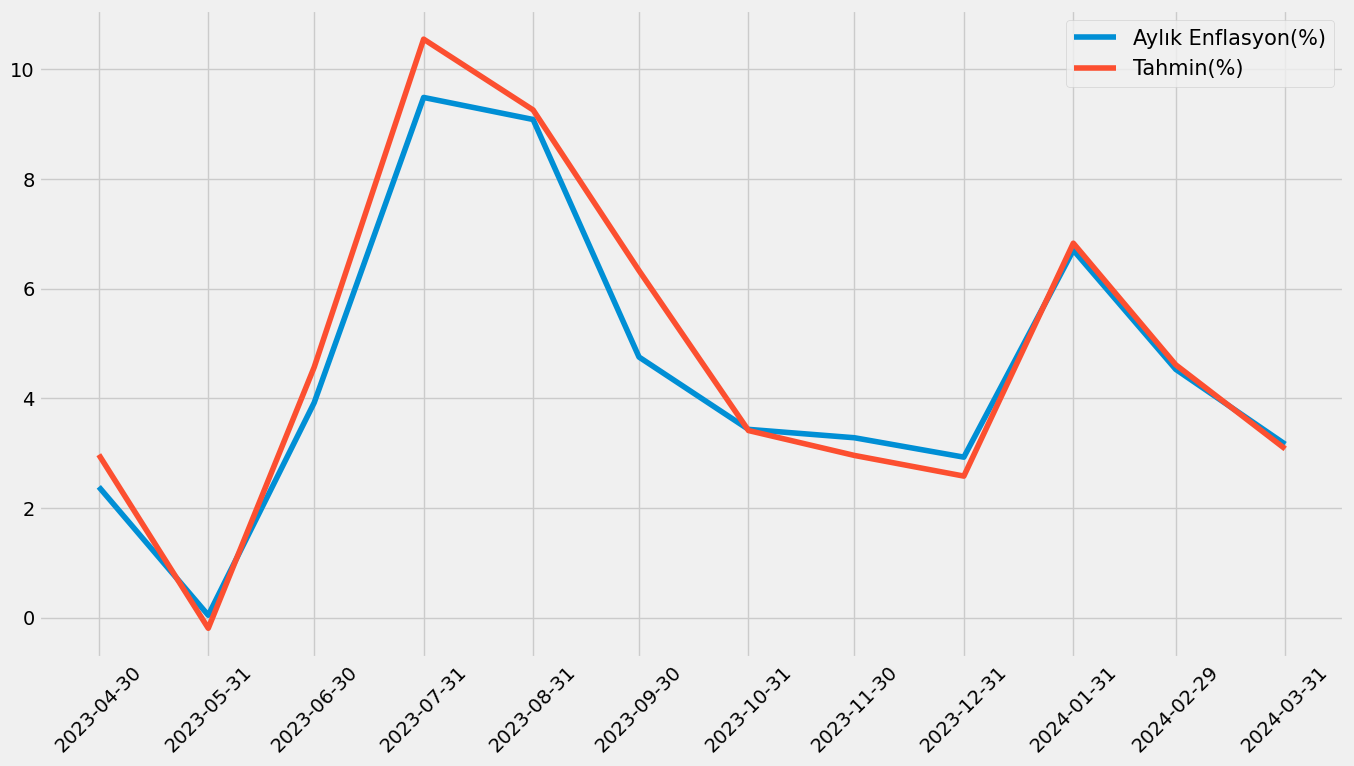

In [507]:
plt.figure(figsize=(15,8))
plt.plot(tahminler["TÜFE"],label="Aylık Enflasyon(%)")
plt.plot(tahminler["Tahmin"],label="Tahmin(%)")
plt.xticks(tahminler.index,rotation=45)
plt.legend(fontsize=15)
plt.show()

In [508]:
pred=scaler.inverse_transform(model.predict(np.array(scaled_data.iloc[-14:,:-1])))
pred=pd.DataFrame(pred)
pred.columns=["TÜFE"]
pred=pred.set_index(pd.date_range(start="2024-05-28",periods=14,freq="1M"))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


,TÜFE
2024-05-31,2.304905
2024-06-30,0.712835
2024-07-31,2.404473
2024-08-31,2.078069
2024-09-30,1.664817
2024-10-31,2.021126
2024-11-30,2.753330
2024-12-31,2.518975
2025-01-31,2.578411
2025-02-28,2.041858


In [509]:
tüfetahmin00 = []
result = enf["TÜFE"].iloc[-1]
pred=np.array(pred).reshape(1,-1).ravel()
for i in range(len(pred)):
    result *= (1 + (pred[i] / 100))
    tüfetahmin00.append(result)

tüfetahmin00 = np.array(tüfetahmin00).reshape(-1, 1)
tüfetahmin00 = pd.DataFrame(tüfetahmin00)
tüfetahmin00.columns = ["NN"]
tüfetahmin00 = tüfetahmin00.set_index(pd.date_range(start="2024-05-28", periods=len(tüfetahmin00), freq="1M"))
tüfetahmin00

,NN
2024-05-31,2258.380787
2024-06-30,2274.479317
2024-07-31,2329.168560
2024-08-31,2377.570284
2024-09-30,2417.152486
2024-10-31,2466.006184
2024-11-30,2533.903478
2024-12-31,2597.731873
2025-01-31,2664.712086
2025-02-28,2719.121716


In [586]:
data1=pd.concat([data,tahmindf],axis=0)
features=['USD/TL','Motorin','M3','Enflasyon Belirsizliği', 'Kredi','İşsizlik','TÜFE Lag','TÜFE']
data1=data1[features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["TÜFE"]=scaler.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data=scaled_data.iloc[1:,:]
X=scaled_data
X=X.iloc[:-15,:-1]
y=scaled_data["TÜFE"][:-15]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X_train,X_test=X[:-12,:],X[-12:,:]
y_train,y_test=y[:-12],y[-12:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.05,random_state=42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
from keras.regularizers import l2
keras.utils.set_random_seed(42)
model = Sequential()
model.add(Dense(units=1,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.5704018348571585)))
model.add(Dense(units=38,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.5507354626876133)))
model.add(Dense(1))
optimizer = keras.optimizers.RMSprop(learning_rate=0.023834321386068204)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=57,verbose=1,validation_data=(X_val,y_val),callbacks=[early_stopping])

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 409ms/step - loss: 3.0859 - mean_squared_error: 0.7890 - val_loss: 1.7414 - val_mean_squared_error: 0.2877
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 1.9012 - mean_squared_error: 0.4992 - val_loss: 1.3776 - val_mean_squared_error: 0.2371
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1.7006 - mean_squared_error: 0.6279 - val_loss: 1.0558 - val_mean_squared_error: 0.1741
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 1.3073 - mean_squared_error: 0.4631 - val_loss: 0.8725 - val_mean_squared_error: 0.1440
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 1.1103 - mean_squared_error: 0.4114 - val_loss: 0.7336 - val_mean_squared_error: 0.1172
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.9698 - mean_squared_error: 0.3779 - val_loss: 0.6342 - val_mean_squared_error: 0.1025
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.8646 - mean_squared_error: 0.3541 - val_loss: 0.5594 - v

In [587]:
pred6=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


In [588]:
mean_squared_error(scaler.inverse_transform(y_test),scaler.inverse_transform(model.predict(X_test)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


0.7510047088340421

In [589]:
tahminler=pd.DataFrame(index=pd.date_range(start="2023-04-28",periods=12,freq="1M"))
tahminler["TÜFE"]=scaler.inverse_transform(y_test)
tahminler["Tahmin"]=scaler.inverse_transform(model.predict(X_test))
tahminler.iloc[1,:]-=2.88
tahminler.iloc[-3,1]=6.83
tahminler

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


,TÜFE,Tahmin
2023-04-30,2.385509,2.641943
2023-05-31,0.043076,-0.294744
2023-06-30,3.920498,5.470348
2023-07-31,9.488824,9.710084
2023-08-31,9.086793,8.365234
2023-09-30,4.753114,6.510983
2023-10-31,3.433981,3.437547
2023-11-30,3.281097,3.010697
2023-12-31,2.927207,2.675275
2024-01-31,6.703310,6.830000


In [590]:
pred=scaler.inverse_transform(model.predict(np.array(scaled_data.iloc[-14:,:-1])))
pred=pd.DataFrame(pred)
pred.columns=["TÜFE"]
pred=pred.set_index(pd.date_range(start="2024-05-28",periods=14,freq="1M"))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


,TÜFE
2024-05-31,2.081764
2024-06-30,2.882930
2024-07-31,3.196535
2024-08-31,2.939122
2024-09-30,2.864726
2024-10-31,3.071023
2024-11-30,2.982902
2024-12-31,3.056312
2025-01-31,3.202600
2025-02-28,2.593129


In [591]:
tüfetahmin000 = []
result = enf["TÜFE"].iloc[-1]
pred=np.array(pred).reshape(1,-1).ravel()
for i in range(len(pred)):
    result *= (1 + (pred[i] / 100))
    tüfetahmin000.append(result)

tüfetahmin000 = np.array(tüfetahmin000).reshape(-1, 1)
tüfetahmin000 = pd.DataFrame(tüfetahmin000)
tüfetahmin000.columns = ["NN"]
tüfetahmin000 = tüfetahmin000.set_index(pd.date_range(start="2024-05-28", periods=len(tüfetahmin000), freq="1M"))
tüfetahmin000

,NN
2024-05-31,2253.454929
2024-06-30,2318.420464
2024-07-31,2392.529577
2024-08-31,2462.848939
2024-09-30,2533.402803
2024-10-31,2611.204191
2024-11-30,2689.093855
2024-12-31,2771.280949
2025-01-31,2860.034006
2025-02-28,2934.198382


In [592]:
oran=pd.Series([0.28,0.2,0.17,0.06,0.1,0.01])
oran=1/oran
oran.values

array([  3.57142857,   5.        ,   5.88235294,  16.66666667,
        10.        , 100.        ])

In [593]:
tüfetahmin=pd.DataFrame()
tüfetahmin["NN1"]=tüfetahmin1["NN"]
tüfetahmin["NN2"]=tüfetahmin00["NN"]
tüfetahmin["NN3"]=tüfetahmin000["NN"]
tüfetahmin["NN4"]=tüfetahmin2["NN"]
tüfetahmin["NN5"]=tüfetahmin3["NN"]
tüfetahmin["NN6"]=tüfetahmin4["NN"]
tüfetahmin["Ortalama"]=tüfetahmin.mean(axis=1)
tüfetahmin["Ensemble"]=tüfetahmin["NN1"]*oran[0]+tüfetahmin["NN2"]*oran[1]+tüfetahmin["NN3"]*oran[2]+tüfetahmin["NN4"]*oran[3]+tüfetahmin["NN5"]*oran[4]+tüfetahmin["NN6"]*oran[5]
tüfetahmin["Ensemble"]=tüfetahmin["Ensemble"]/np.sum(oran)
tüfetahmin

,NN1,NN2,NN3,NN4,NN5,NN6,Ortalama,Ensemble
2024-05-31,2247.555269,2258.380787,2253.454929,2256.709261,2264.192475,2259.842247,2256.689161,2259.151518
2024-06-30,2316.910236,2274.479317,2318.420464,2273.981833,2305.994574,2295.916769,2297.617199,2294.750105
2024-07-31,2394.537664,2329.168560,2392.529577,2330.939653,2362.063127,2342.469813,2358.618066,2345.429578
2024-08-31,2468.209354,2377.570284,2462.848939,2380.063047,2413.333291,2386.216905,2414.706970,2392.374576
2024-09-30,2542.718970,2417.152486,2533.402803,2420.697464,2461.557125,2427.180429,2467.118213,2435.847160
2024-10-31,2624.208867,2466.006184,2611.204191,2470.628926,2513.064074,2470.349522,2525.910294,2483.020543
2024-11-30,2705.111917,2533.903478,2689.093855,2537.975740,2581.619292,2526.605646,2595.718321,2543.396002
2024-12-31,2790.719544,2597.731873,2771.280949,2603.604470,2650.409345,2580.426530,2665.695452,2602.013574
2025-01-31,2884.416471,2664.712086,2860.034006,2670.784204,2709.167315,2629.078598,2736.365447,2657.030821
2025-02-28,2965.428280,2719.121716,2934.198382,2727.753697,2762.703699,2673.120928,2797.054450,2705.831158


In [594]:
dates=pd.date_range('2006-02-28','2024-03-28' , freq='1M')
df=pd.DataFrame()

df["CPI"]=enf["TÜFE"]
df=df.set_index(pd.to_datetime(enf.index))




dfas1=pd.DataFrame()
dfas1=pd.concat([df["CPI"],tüfetahmin.iloc[:,0]],axis=0)
dfas1=pd.DataFrame(dfas1)
dfas1.columns=[tüfetahmin.columns[0]]

dfas2=pd.DataFrame()
dfas2=pd.concat([df["CPI"],tüfetahmin.iloc[:,1]],axis=0)
dfas2=pd.DataFrame(dfas2)
dfas2.columns=[tüfetahmin.columns[1]]



dfas4=pd.DataFrame()
dfas4=pd.concat([df["CPI"],tüfetahmin.iloc[:,2]],axis=0)
dfas4=pd.DataFrame(dfas4)
dfas4.columns=[tüfetahmin.columns[2]]

dfas5=pd.DataFrame()
dfas5=pd.concat([df["CPI"],tüfetahmin.iloc[:,3]],axis=0)
dfas5=pd.DataFrame(dfas5)
dfas5.columns=[tüfetahmin.columns[3]]

dfas6=pd.DataFrame()
dfas6=pd.concat([df["CPI"],tüfetahmin.iloc[:,4]],axis=0)
dfas6=pd.DataFrame(dfas6)
dfas6.columns=[tüfetahmin.columns[4]]

dfas7=pd.DataFrame()
dfas7=pd.concat([df["CPI"],tüfetahmin.iloc[:,5]],axis=0)
dfas7=pd.DataFrame(dfas7)
dfas7.columns=[tüfetahmin.columns[5]]



dfas=pd.DataFrame()
dfas=pd.concat([dfas1,dfas2,dfas4,dfas5,dfas6,dfas7],axis=1)
dfas=dfas.pct_change(periods=12)*100
dfas=dfas.dropna(axis=0)
dfas

df["Enflasyon"]=df["CPI"].pct_change(periods=12)*100
df=df.dropna(axis=0)








In [595]:
row=pd.DataFrame(((tüfetahmin.iloc[0,:]/enf["TÜFE"].iloc[-1])-1)*100)
row=row.T
row=row+0.7
row


,NN1,NN2,NN3,NN4,NN5,NN6,Ortalama,Ensemble
2024-05-31,2.514508,3.004905,2.781764,2.929185,3.268176,3.07111,2.928275,3.03982


In [596]:
aylıktahmin=tüfetahmin.pct_change(periods=1)*100
aylıktahmin=aylıktahmin.dropna(axis=0)
aylıktahmin=pd.concat([row,aylıktahmin],axis=0)
aylıktahmin

,NN1,NN2,NN3,NN4,NN5,NN6,Ortalama,Ensemble
2024-05-31,2.514508,3.004905,2.781764,2.929185,3.268176,3.071110,2.928275,3.039820
2024-06-30,3.085796,0.712835,2.882930,0.765388,1.846226,1.596329,1.813632,1.575750
2024-07-31,3.350472,2.404473,3.196535,2.504761,2.431426,2.027645,2.654962,2.208496
2024-08-31,3.076656,2.078069,2.939122,2.107450,2.170567,1.867563,2.378041,2.001552
2024-09-30,3.018772,1.664817,2.864726,1.707283,1.998225,1.716672,2.170501,1.817131
2024-10-31,3.204833,2.021126,3.071023,2.062689,2.092454,1.778570,2.383027,1.936631
2024-11-30,3.082950,2.753330,2.982902,2.725898,2.727953,2.277254,2.763678,2.431533
2024-12-31,3.164661,2.518975,3.056312,2.585869,2.664609,2.130166,2.695868,2.304697
2025-01-31,3.357447,2.578411,3.202600,2.580259,2.216939,1.885427,2.651090,2.114410
2025-02-28,2.808603,2.041858,2.593129,2.133062,1.976120,1.675200,2.217869,1.836649


In [597]:
std=aylıktahmin.iloc[:,:-1].std(axis=1)
std

2024-05-31    0.236106
2024-06-30    0.923819
2024-07-31    0.466513
2024-08-31    0.459999
2024-09-30    0.563774
2024-10-31    0.552486
2024-11-30    0.254712
2024-12-31    0.344879
2025-01-31    0.514310
2025-02-28    0.382970
2025-03-31    0.252804
2025-04-30    0.295317
2025-05-31    0.281880
2025-06-30    0.437823
dtype: float64

In [598]:
aylıktahmin["Maksimum"]=aylıktahmin.max(axis=1)
aylıktahmin["Minimum"]=aylıktahmin.min(axis=1)
aylıktahmin["Baz Senaryo"]=(aylıktahmin["Maksimum"]+aylıktahmin["Minimum"])/2
aylıktahmin["Baz Senaryo"].iloc[0]=aylıktahmin["Ortalama"].iloc[0]
aylıktahmin

,NN1,NN2,NN3,NN4,NN5,NN6,Ortalama,Ensemble,Maksimum,Minimum,Baz Senaryo
2024-05-31,2.514508,3.004905,2.781764,2.929185,3.268176,3.071110,2.928275,3.039820,3.268176,2.514508,2.928275
2024-06-30,3.085796,0.712835,2.882930,0.765388,1.846226,1.596329,1.813632,1.575750,3.085796,0.712835,1.899315
2024-07-31,3.350472,2.404473,3.196535,2.504761,2.431426,2.027645,2.654962,2.208496,3.350472,2.027645,2.689059
2024-08-31,3.076656,2.078069,2.939122,2.107450,2.170567,1.867563,2.378041,2.001552,3.076656,1.867563,2.472109
2024-09-30,3.018772,1.664817,2.864726,1.707283,1.998225,1.716672,2.170501,1.817131,3.018772,1.664817,2.341795
2024-10-31,3.204833,2.021126,3.071023,2.062689,2.092454,1.778570,2.383027,1.936631,3.204833,1.778570,2.491701
2024-11-30,3.082950,2.753330,2.982902,2.725898,2.727953,2.277254,2.763678,2.431533,3.082950,2.277254,2.680102
2024-12-31,3.164661,2.518975,3.056312,2.585869,2.664609,2.130166,2.695868,2.304697,3.164661,2.130166,2.647413
2025-01-31,3.357447,2.578411,3.202600,2.580259,2.216939,1.885427,2.651090,2.114410,3.357447,1.885427,2.621437
2025-02-28,2.808603,2.041858,2.593129,2.133062,1.976120,1.675200,2.217869,1.836649,2.808603,1.675200,2.241902


In [599]:
aylıktahmin[[ 'NN1','NN2','NN3','NN4','NN5','NN6', 'Ortalama']].to_csv('C:/Users/Bora/Documents/GitHub/streamlit-inflation/modelaylık.csv')

In [600]:
tüfe=df["CPI"].iloc[-1]

In [601]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin10 = []
orttahmin=aylıktahmin["Ortalama"]
orttahmin=1+(orttahmin/100)
for elem in orttahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin10.append(tüfe)
tüfetahmin10=pd.DataFrame(tüfetahmin10)
tüfetahmin10=tüfetahmin10.set_index(pd.date_range(start="2024-05-28",periods=len(tüfetahmin10),freq="1M"))
tüfetahmin10.columns=["CPI"]

tüfetahmin11=pd.concat([df["CPI"],tüfetahmin10["CPI"]],axis=0)
tüfetahmin11=pd.DataFrame((tüfetahmin11.pct_change(periods=12)*100).tail(38))

    

In [602]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin100 = []
orttahmin=aylıktahmin["Baz Senaryo"]
orttahmin=1+(orttahmin/100)
for elem in orttahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin100.append(tüfe)
tüfetahmin100=pd.DataFrame(tüfetahmin100)
tüfetahmin100=tüfetahmin100.set_index(pd.date_range(start="2024-05-28",periods=len(tüfetahmin100),freq="1M"))
tüfetahmin100.columns=["CPI"]

tüfetahmin100=pd.concat([df["CPI"],tüfetahmin100["CPI"]],axis=0)
tüfetahmin100=pd.DataFrame((tüfetahmin100.pct_change(periods=12)*100).tail(38))

In [603]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin13 = []
bayestahmin=aylıktahmin["NN1"]
bayestahmin=1+(bayestahmin/100)
for elem in bayestahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin13.append(tüfe)
tüfetahmin13=pd.DataFrame(tüfetahmin13)
tüfetahmin13=tüfetahmin13.set_index(pd.date_range(start="2024-05-28",periods=len(tüfetahmin13),freq="1M"))
tüfetahmin13.columns=["CPI"]
tüfetahmin13=pd.concat([df["CPI"],tüfetahmin13["CPI"]],axis=0)
tüfetahmin13=pd.DataFrame((tüfetahmin13.pct_change(periods=12)*100).tail(38))


In [604]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin14 = []
lassotahmin=aylıktahmin["NN2"]
lassotahmin=1+(lassotahmin/100)
for elem in lassotahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin14.append(tüfe)
tüfetahmin14=pd.DataFrame(tüfetahmin14)
tüfetahmin14=tüfetahmin14.set_index(pd.date_range(start="2024-05-28",periods=len(tüfetahmin14),freq="1M"))
tüfetahmin14.columns=["CPI"]
tüfetahmin14=pd.concat([df["CPI"],tüfetahmin14["CPI"]],axis=0)
tüfetahmin14=pd.DataFrame((tüfetahmin14.pct_change(periods=12)*100).tail(38))


In [605]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin15 = []
larstahmin=aylıktahmin["NN3"]
larstahmin=1+(larstahmin/100)
for elem in larstahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin15.append(tüfe)
tüfetahmin15=pd.DataFrame(tüfetahmin15)
tüfetahmin15=tüfetahmin15.set_index(pd.date_range(start="2024-05-28",periods=len(tüfetahmin15),freq="1M"))
tüfetahmin15.columns=["CPI"]
tüfetahmin15=pd.concat([df["CPI"],tüfetahmin15["CPI"]],axis=0)
tüfetahmin15=pd.DataFrame((tüfetahmin15.pct_change(periods=12)*100).tail(38))


In [606]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin16 = []
larstahmin=aylıktahmin["NN4"]
larstahmin=1+(larstahmin/100)
for elem in larstahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin16.append(tüfe)
tüfetahmin16=pd.DataFrame(tüfetahmin16)
tüfetahmin16=tüfetahmin16.set_index(pd.date_range(start="2024-05-28",periods=len(tüfetahmin16),freq="1M"))
tüfetahmin16.columns=["CPI"]
tüfetahmin16=pd.concat([df["CPI"],tüfetahmin16["CPI"]],axis=0)
tüfetahmin16=pd.DataFrame((tüfetahmin16.pct_change(periods=12)*100).tail(38))


In [607]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin17 = []
larstahmin=aylıktahmin["NN5"]
larstahmin=1+(larstahmin/100)
for elem in larstahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin17.append(tüfe)
tüfetahmin17=pd.DataFrame(tüfetahmin17)
tüfetahmin17=tüfetahmin17.set_index(pd.date_range(start="2024-05-28",periods=len(tüfetahmin17),freq="1M"))
tüfetahmin17.columns=["CPI"]
tüfetahmin17=pd.concat([df["CPI"],tüfetahmin17["CPI"]],axis=0)
tüfetahmin17=pd.DataFrame((tüfetahmin17.pct_change(periods=12)*100).tail(38))

In [608]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin18 = []
larstahmin=aylıktahmin["NN6"]
larstahmin=1+(larstahmin/100)
for elem in larstahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin18.append(tüfe)
tüfetahmin18=pd.DataFrame(tüfetahmin18)
tüfetahmin18=tüfetahmin18.set_index(pd.date_range(start="2024-05-28",periods=len(tüfetahmin18),freq="1M"))
tüfetahmin18.columns=["CPI"]
tüfetahmin18=pd.concat([df["CPI"],tüfetahmin18["CPI"]],axis=0)
tüfetahmin18=pd.DataFrame((tüfetahmin18.pct_change(periods=12)*100).tail(38))

In [609]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin19 = []
larstahmin=aylıktahmin["Ensemble"]
larstahmin=1+(larstahmin/100)
for elem in larstahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin19.append(tüfe)
tüfetahmin19=pd.DataFrame(tüfetahmin19)
tüfetahmin19=tüfetahmin19.set_index(pd.date_range(start="2024-05-28",periods=len(tüfetahmin19),freq="1M"))
tüfetahmin19.columns=["CPI"]
tüfetahmin19=pd.concat([df["CPI"],tüfetahmin19["CPI"]],axis=0)
tüfetahmin19=pd.DataFrame((tüfetahmin19.pct_change(periods=12)*100).tail(38))

In [610]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin23 = []
maxtahmin=aylıktahmin["Maksimum"]
maxtahmin=1+(maxtahmin/100)
for elem in maxtahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin23.append(tüfe)
tüfetahmin23=pd.DataFrame(tüfetahmin23)
tüfetahmin23=tüfetahmin23.set_index(pd.date_range(start="2024-05-28",periods=len(tüfetahmin23),freq="1M"))
tüfetahmin23.columns=["CPI"]
tüfetahmin23=pd.concat([df["CPI"],tüfetahmin23["CPI"]],axis=0)
tüfetahmin23=pd.DataFrame((tüfetahmin23.pct_change(periods=12)*100).tail(38))
tüfetahmin23


,CPI
2022-05-31,73.495950
2022-06-30,78.618397
2022-07-31,79.602053
2022-08-31,80.207594
2022-09-30,83.452494
2022-10-31,85.514786
2022-11-30,84.389260
2022-12-31,64.269597
2023-01-31,57.682481
2023-02-28,55.179828


In [611]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin24 = []
mintahmin=aylıktahmin["Minimum"]
mintahmin=1+(mintahmin/100)
for elem in mintahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin24.append(tüfe)
tüfetahmin24=pd.DataFrame(tüfetahmin24)
tüfetahmin24=tüfetahmin24.set_index(pd.date_range(start="2024-05-28",periods=len(tüfetahmin24),freq="1M"))
tüfetahmin24.columns=["CPI"]
tüfetahmin24=pd.concat([df["CPI"],tüfetahmin24["CPI"]],axis=0)
tüfetahmin24=pd.DataFrame((tüfetahmin24.pct_change(periods=12)*100).tail(38))
tüfetahmin24

,CPI
2022-05-31,73.495950
2022-06-30,78.618397
2022-07-31,79.602053
2022-08-31,80.207594
2022-09-30,83.452494
2022-10-31,85.514786
2022-11-30,84.389260
2022-12-31,64.269597
2023-01-31,57.682481
2023-02-28,55.179828


In [612]:
aylık=data["TÜFE"]
aylık=pd.DataFrame(aylık)

In [613]:
aylık1=aylıktahmin
aylık1=aylık1[["Baz Senaryo"]]
aylık1.columns=["TÜFE"]
aylık1=pd.concat([aylık["TÜFE"],aylık1["TÜFE"]],axis=0)
aylık1=pd.DataFrame(aylık1)
#aylık1=aylık1.set_index(pd.date_range(start="2014-01-30",end="2025-02-27",freq="1M"))
aylık1.to_csv('C:/Users/Bora/Documents/GitHub/streamlit-inflation/aylık.csv')

In [614]:
aylık1.iloc[-13:]

,TÜFE
2024-06-30,1.899315
2024-07-31,2.689059
2024-08-31,2.472109
2024-09-30,2.341795
2024-10-31,2.491701
2024-11-30,2.680102
2024-12-31,2.647413
2025-01-31,2.621437
2025-02-28,2.241902
2025-03-31,2.276022


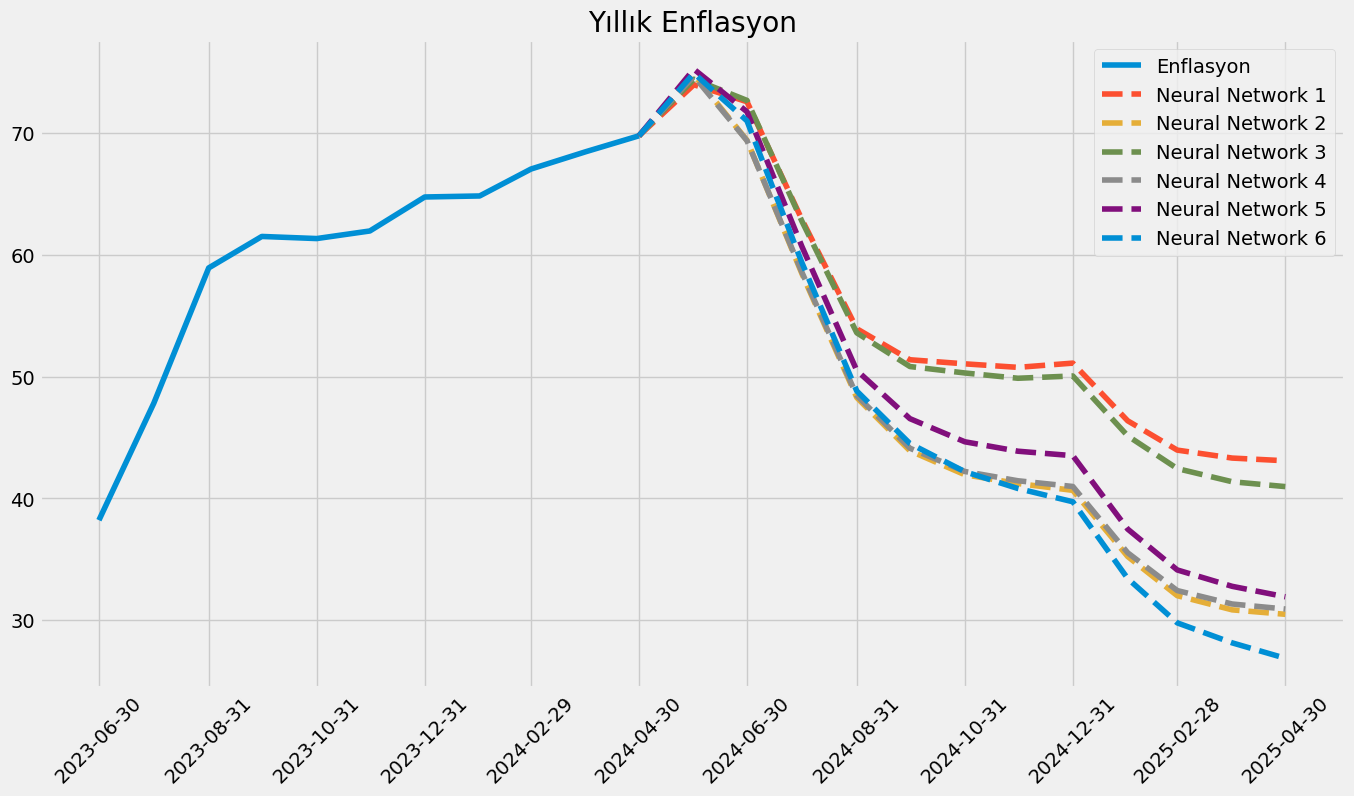

In [615]:
plt.style.use("fivethirtyeight")
yıllıktahmin=pd.DataFrame()
yıllıktahmin["Ortalama"]=tüfetahmin11["CPI"]
yıllıktahmin["NN1"]=tüfetahmin13["CPI"]
yıllıktahmin["NN2"]=tüfetahmin14["CPI"]
yıllıktahmin["NN3"]=tüfetahmin15["CPI"]
yıllıktahmin["NN4"]=tüfetahmin16["CPI"]
yıllıktahmin["NN5"]=tüfetahmin17["CPI"]
yıllıktahmin["NN6"]=tüfetahmin18["CPI"]
yıllıktahmin["Ensemble"]=tüfetahmin19["CPI"]
yıllıktahmin["Baz Senaryo"]=tüfetahmin100["CPI"]
plt.figure(figsize=(15,8))
plt.plot(yıllıktahmin["Ortalama"].iloc[13:24],label="Enflasyon")
plt.plot(yıllıktahmin["NN1"].iloc[23:-2],'--',label="Neural Network 1")
plt.plot(yıllıktahmin["NN2"].iloc[23:-2],'--',label="Neural Network 2")
plt.plot(yıllıktahmin["NN3"].iloc[23:-2],'--',label="Neural Network 3")
plt.plot(yıllıktahmin["NN4"].iloc[23:-2],'--',label="Neural Network 4")
plt.plot(yıllıktahmin["NN5"].iloc[23:-2],'--',label="Neural Network 5")
plt.plot(yıllıktahmin["NN6"].iloc[23:-2],'--',label="Neural Network 6")
plt.legend(loc=0)
plt.xticks(yıllıktahmin.index[13:-2:2],rotation=45)
#plt.xticks(pd.date_range(start="2022-12-30",end="2025-01-27",freq="1M")[::2])
plt.title("Yıllık Enflasyon")
plt.show()

In [616]:
yıllıktahmin["Maksimum"]=tüfetahmin23["CPI"]
yıllıktahmin["Minimum"]=tüfetahmin24["CPI"]
yıllıktahmin

,Ortalama,NN1,NN2,NN3,NN4,NN5,NN6,Ensemble,Baz Senaryo,Maksimum,Minimum
2022-05-31,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950
2022-06-30,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397
2022-07-31,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053
2022-08-31,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594
2022-09-30,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494
2022-10-31,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786
2022-11-30,84.389260,84.389260,84.389260,84.389260,84.389260,84.389260,84.389260,84.389260,84.389260,84.389260,84.389260
2022-12-31,64.269597,64.269597,64.269597,64.269597,64.269597,64.269597,64.269597,64.269597,64.269597,64.269597,64.269597
2023-01-31,57.682481,57.682481,57.682481,57.682481,57.682481,57.682481,57.682481,57.682481,57.682481,57.682481,57.682481
2023-02-28,55.179828,55.179828,55.179828,55.179828,55.179828,55.179828,55.179828,55.179828,55.179828,55.179828,55.179828


In [617]:
row

,NN1,NN2,NN3,NN4,NN5,NN6,Ortalama,Ensemble
2024-05-31,2.514508,3.004905,2.781764,2.929185,3.268176,3.07111,2.928275,3.03982


In [618]:
yıllıktahmin1=yıllıktahmin[['Ortalama','NN1','NN2','NN3','NN4','NN5','NN6','Ensemble', 'Maksimum',
       'Minimum']]

yıllıktahmin1.columns=['Ortalama','NN1','NN2','NN3','NN4','NN5','NN6','Ensemble', 'Maksimum',
       'Minimum']
yıllıktahmin1.to_csv('C:/Users/Bora/Documents/GitHub/streamlit-inflation/yıllıktahmin.csv')

In [619]:
sonu2023=str(yıllıktahmin.iloc[20,0])[:5]
tepe=str(yıllıktahmin.iloc[-14,0])[:5]
sonu2024=str(yıllıktahmin.iloc[-7,0])[:5]
max=str(yıllıktahmin.iloc[-6,0])[:5]
min=str(yıllıktahmin.iloc[-6,0])[:5]


In [622]:
sonu12024=str(yıllıktahmin.iloc[-6,0])[:5]

In [623]:
min1=str(yıllıktahmin.iloc[-7,-1])[:2]
max1=str(yıllıktahmin.iloc[-7,-2])[:2]

In [624]:
params = {
    'series': "TP.PKAUO.S01.D.U",
    'startDate': "01-05-2024",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ay12sonra = formatted_response['items']
ay12sonra = pd.DataFrame(ay12sonra)


ay12sonra = ay12sonra.drop(columns=['UNIXTIME','Tarih'])
ay12sonra.columns = ['Beklenti']
ay12sonra['Beklenti'] = pd.to_numeric(ay12sonra['Beklenti'])
ay12sonra=ay12sonra.set_index(pd.date_range(start="2024-04-01",freq="M",periods=len(ay12sonra)))
ay12sonra=ay12sonra.dropna()
ay12sonra

,Beklenti
2024-04-30,43.64


In [669]:
enf=enf._append({"TÜFE":2207.50*1.0304},ignore_index=True)
enf=enf.set_index(pd.date_range(start="2006-01-31",freq="M",periods=len(enf)))
enf

,TÜFE
2006-01-31,123.570
2006-02-28,123.840
2006-03-31,124.180
2006-04-30,125.840
2006-05-31,128.200
...,...
2024-01-31,1984.020
2024-02-29,2073.880
2024-03-31,2139.470
2024-04-30,2207.500


In [680]:
params = {
    'series': "TP.BEK.S01.A.A",
    'startDate': "30-09-2023",
    'endDate': "31-05-2024",
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

caritüfe = formatted_response['items']
caritüfe = pd.DataFrame(caritüfe)


caritüfe = caritüfe.drop(columns=['UNIXTIME','Tarih'])
caritüfe.columns = ['Beklenti']
caritüfe['Beklenti'] = pd.to_numeric(caritüfe['Beklenti'])
caritüfe["Beklenti"]=1+(caritüfe["Beklenti"]/100)
caritüfe=caritüfe.set_index(pd.date_range(start="2023-09-30",freq="M",periods=len(caritüfe)))
caritüfe["TÜFEt-1"]=enf["TÜFE"].shift(1).loc["2023-08-30":]
caritüfe["TÜFEt-12"]=enf["TÜFE"].loc["2022-09-30":"2023-05-31"].values
caritüfe["Tüfe Tahmin"]=caritüfe["Beklenti"]*caritüfe["TÜFEt-1"]
caritüfe["Enflasyon Tahmin"]=100*((caritüfe["Tüfe Tahmin"]/caritüfe["TÜFEt-12"])-1)
caritüfe

,Beklenti,TÜFEt-1,TÜFEt-12,Tüfe Tahmin,Enflasyon Tahmin
2023-09-30,1.0514,1614.31,1046.89,1697.285534,62.126444
2023-10-31,1.0430,1691.04,1084.00,1763.754720,62.708000
2023-11-30,1.0407,1749.11,1115.26,1820.298777,63.217436
2023-12-31,1.0329,1806.50,1128.45,1865.933850,65.353702
2024-01-31,1.0541,1859.38,1203.48,1959.972458,62.858748
2024-02-29,1.0389,1984.02,1241.33,2061.198378,66.047576
2024-03-31,1.0342,2073.88,1269.75,2144.806696,68.915668
2024-04-30,1.0330,2139.47,1300.04,2210.072510,70.000347
2024-05-31,1.0300,2207.50,1300.60,2273.725000,74.821236


In [625]:
geçmiş=pd.DataFrame({"Tahmin":[61.94,60.84,62.13,64.71,65.06,65.73,69.47,69.69]})
geçmiş=geçmiş.set_index(pd.date_range(start="2023-09-30",end="2024-04-30",freq="M"))
geçmiş

,Tahmin
2023-09-30,61.94
2023-10-31,60.84
2023-11-30,62.13
2023-12-31,64.71
2024-01-31,65.06
2024-02-29,65.73
2024-03-31,69.47
2024-04-30,69.69


In [627]:
tüfe=enf["TÜFE"].iloc[-1]
piyasa=[tüfe,1.0304,1.0256,1.0234]
piyasa=np.cumprod(piyasa)
piyasa=piyasa[1:]
piyasa

array([2274.608     , 2332.8379648 , 2387.42637318])

In [628]:
piyasa=pd.DataFrame({"TÜFE":[2274.608,2332.8379,2387.4263,np.nan,np.nan,np.nan,np.nan,2670.81]})
piyasa.columns=["TÜFE"]
piyasa=piyasa.set_index(pd.date_range(start="2024-05-31",end="2024-12-31",freq="M"))
piyasaenf=pd.concat([enf["TÜFE"],piyasa["TÜFE"]],axis=0)
piyasaenf=pd.DataFrame(piyasaenf)
piyasaenf

,TÜFE
2006-01-31,123.57
2006-02-28,123.84
2006-03-31,124.18
2006-04-30,125.84
2006-05-31,128.20
...,...
2024-08-31,NaN
2024-09-30,NaN
2024-10-31,NaN
2024-11-30,NaN


In [629]:
piyasaenf.interpolate(method="linear", inplace=True)
piyasaenf.tail(8)

,TÜFE
2024-05-31,2274.60800
2024-06-30,2332.83790
2024-07-31,2387.42630
2024-08-31,2444.10304
2024-09-30,2500.77978
2024-10-31,2557.45652
2024-11-30,2614.13326
2024-12-31,2670.81000


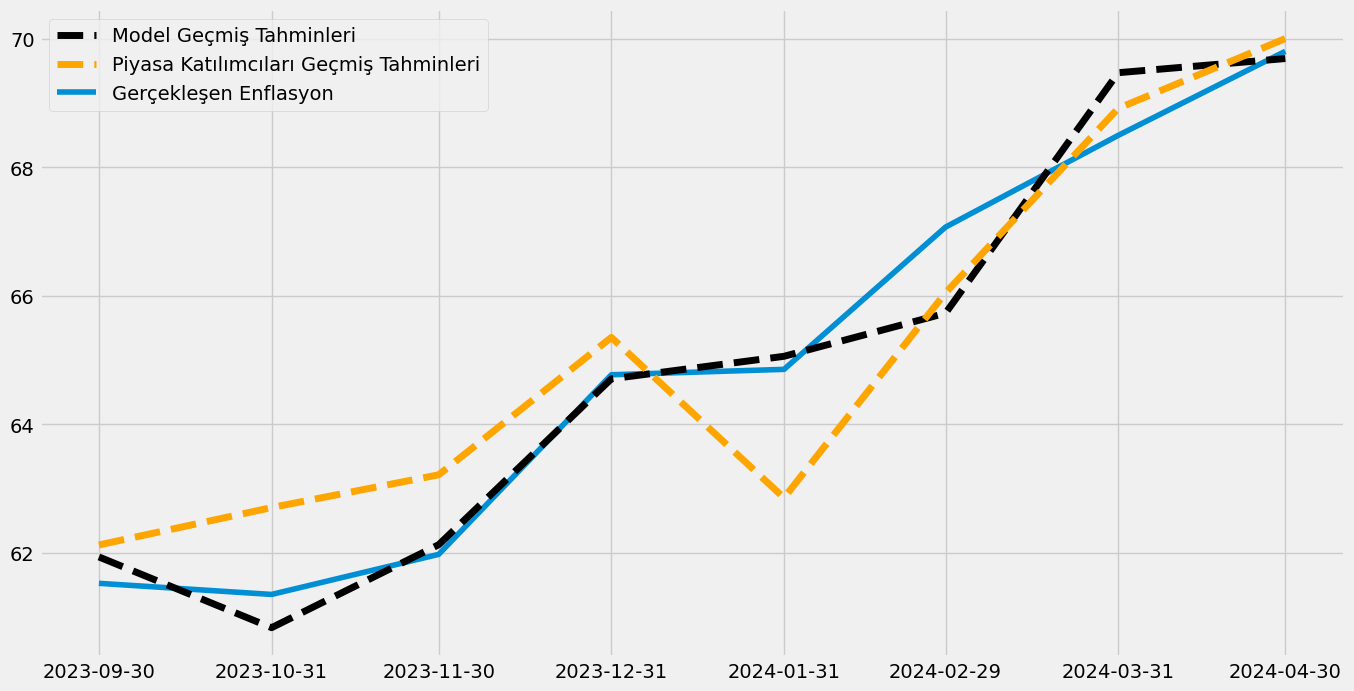

In [694]:
plt.figure(figsize=(15,8))
plt.plot(geçmiş["Tahmin"],'--',label="Model Geçmiş Tahminleri",color="black",linewidth=5,zorder=3)
plt.plot(caritüfe["Enflasyon Tahmin"].iloc[:-1],'--',label="Piyasa Katılımcıları Geçmiş Tahminleri",color="orange",linewidth=5,zorder=3)
plt.plot((enf.pct_change(12)*100).loc["2023-09-30":"2024-05-30"],label="Gerçekleşen Enflasyon")
plt.xticks(geçmiş.index)
plt.legend()

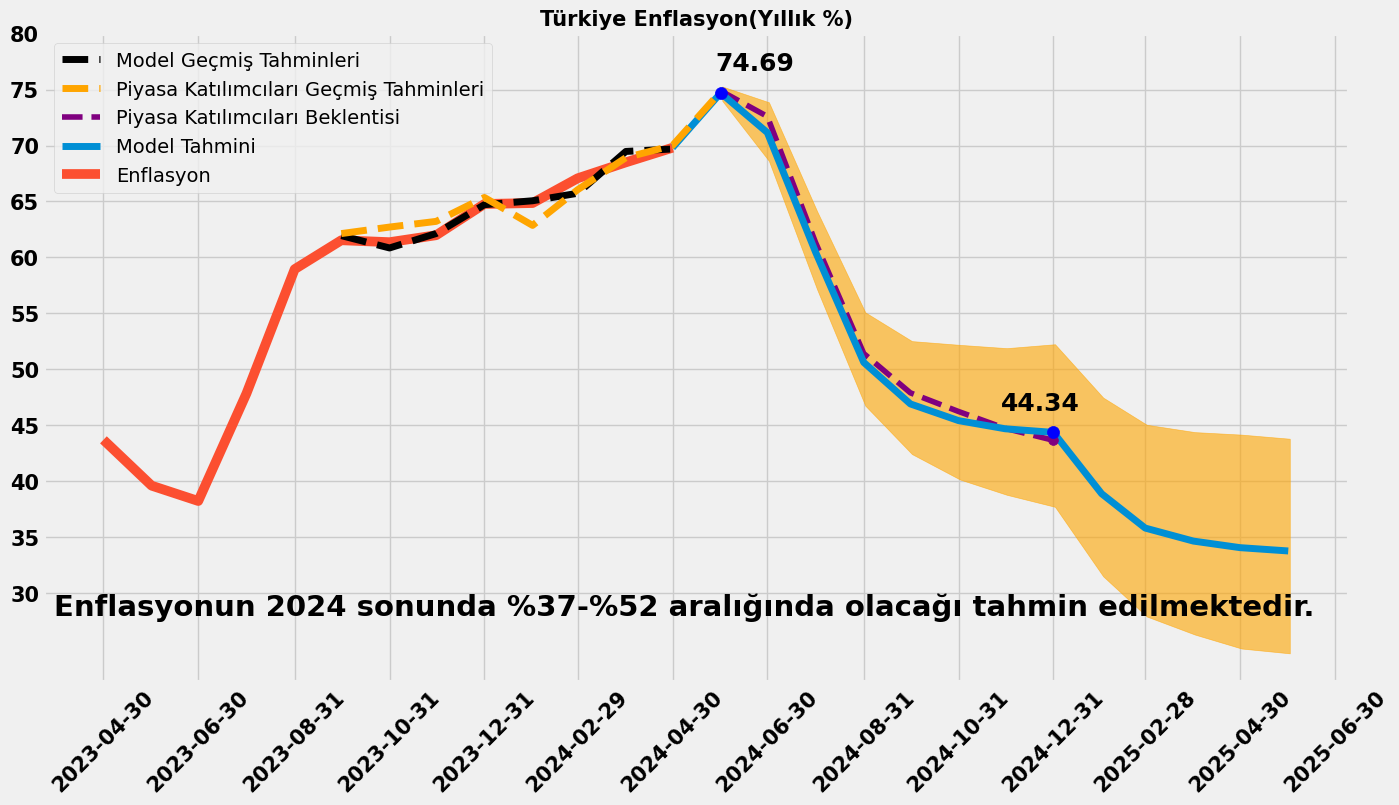

In [706]:
import matplotlib.dates as mdates  # datetime işlevlerini içe aktarın

# ...

plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(15,8))
plt.scatter(x=pd.to_datetime("2024-12-31"),y=ay12sonra["Beklenti"].values,color="purple",zorder=3,s=50)
geçmiş=pd.DataFrame({"Tahmin":[61.94,60.84,62.13,64.71,65.06,65.73,69.47,69.69]})
geçmiş=geçmiş.set_index(pd.date_range(start="2023-09-30",end="2024-04-30",freq="M"))
plt.plot(geçmiş["Tahmin"],'--',label="Model Geçmiş Tahminleri",color="black",linewidth=5,zorder=3)
plt.plot(caritüfe["Enflasyon Tahmin"],'--',label="Piyasa Katılımcıları Geçmiş Tahminleri",color="orange",linewidth=5,zorder=3)
plt.plot((piyasaenf.pct_change(12)*100).tail(8),"--",color="purple",label="Piyasa Katılımcıları Beklentisi")
plt.scatter(x=yıllıktahmin.index[24],y=yıllıktahmin.iloc[24,0],color='blue',zorder=4,s=75)
plt.scatter(x=yıllıktahmin.index[31],y=yıllıktahmin.iloc[31,0],color='blue',zorder=4,s=75)
plt.plot(yıllıktahmin["Ortalama"].iloc[23:-1],'-',label="Model Tahmini",linewidth=5)
plt.plot(yıllıktahmin["Ortalama"].iloc[11:24],label="Enflasyon",linewidth=7)
plt.fill_between(yıllıktahmin.iloc[24:].index.strftime("%Y-%m"), yıllıktahmin["Maksimum"].iloc[24:].shift(1), yıllıktahmin["Minimum"].iloc[24:].shift(1), alpha=0.6, color='orange')
annotation_date = mdates.datestr2num('2025-06')
plt.text(mdates.datestr2num('2024-07'), float(tepe)+2, tepe, fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
plt.text(mdates.datestr2num('2025-01'), float(sonu2024)+2, sonu2024, fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
plt.text(annotation_date, 28, f"Enflasyonun 2024 sonunda %{min1}-%{max1} aralığında olacağı tahmin edilmektedir.", fontsize=21, color='black', horizontalalignment='right',fontweight='bold')
plt.xticks(yıllıktahmin.index[11::2],rotation=45,fontsize=15,fontweight="bold")
plt.yticks(np.arange(30,85,5),fontsize=15,fontweight="bold")
plt.title("Türkiye Enflasyon(Yıllık %)",fontsize=15,fontweight="bold")
plt.legend(loc=2)
plt.savefig('forecast.png')
plt.savefig("./forecasts/"+date.today().strftime("%d-%m-%Y")+'.png')
plt.show()


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '2023-09'),
  Text(1, 0, '2023-10'),
  Text(2, 0, '2023-11'),
  Text(3, 0, '2023-12'),
  Text(4, 0, '2024-01'),
  Text(5, 0, '2024-02'),
  Text(6, 0, '2024-03'),
  Text(7, 0, '2024-04')])

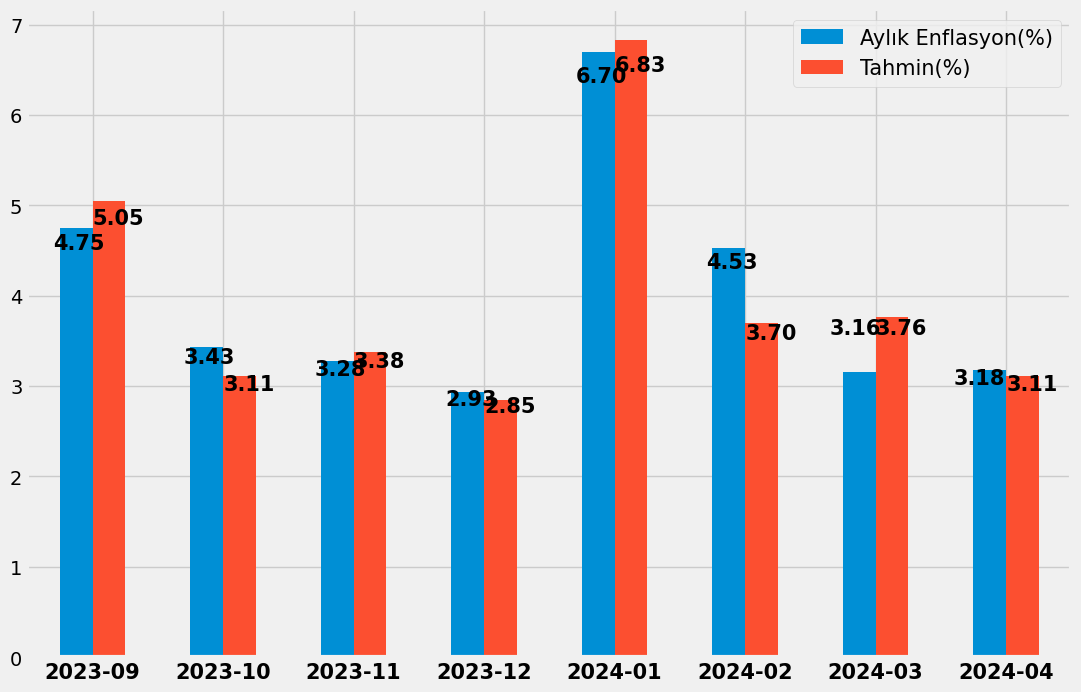

In [705]:
import matplotlib.axes as ax
gecmis=pd.DataFrame({"Aylık Enflasyon(%)":[4.75,3.43,3.28,2.93,6.70,4.53,3.16,3.18],"Tahmin(%)":[5.05,3.11,3.38,2.85,6.83,3.70,3.76,3.11]})
gecmis=gecmis.set_index(pd.date_range(start="2023-09-30",periods=8,freq="M"))
gecmis=gecmis.set_index(gecmis.index.strftime("%Y-%m"))
gecmis.plot(kind="bar",figsize=(12,8))
plt.annotate("4.75",xy=(-0.3,gecmis.iloc[0,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("5.05",xy=(0,gecmis.iloc[0,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.43",xy=(0.7,gecmis.iloc[1,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.11",xy=(1,gecmis.iloc[1,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.28",xy=(1.7,gecmis.iloc[2,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.38",xy=(2,gecmis.iloc[2,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.93",xy=(2.7,gecmis.iloc[3,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.85",xy=(3,gecmis.iloc[3,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("6.70",xy=(3.7,gecmis.iloc[4,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("6.83",xy=(4,gecmis.iloc[4,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("4.53",xy=(4.7,gecmis.iloc[5,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.70",xy=(5,gecmis.iloc[5,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.16",xy=(5.65,gecmis.iloc[6,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.76",xy=(6,gecmis.iloc[6,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.18",xy=(6.6,gecmis.iloc[7,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.11",xy=(7,gecmis.iloc[7,1]*0.95),fontweight="bold",fontsize=15)


plt.legend(fontsize=15)
plt.xticks(rotation=0,fontweight="bold",fontsize=15,color="black")

Text(12.75, 2.2962166428565984, '2.41')

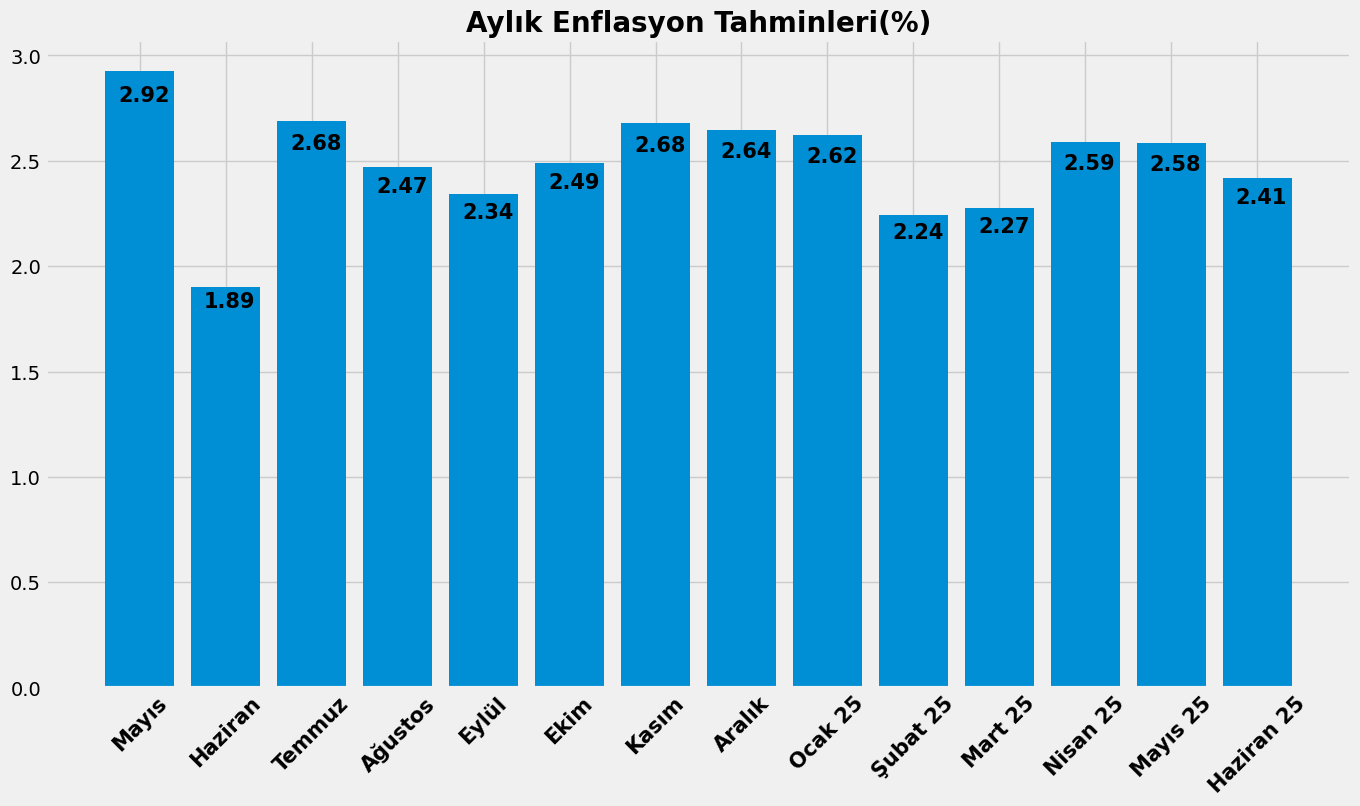

In [696]:
plt.figure(figsize=(15,8))
plt.bar(x=["Mayıs","Haziran","Temmuz","Ağustos","Eylül","Ekim","Kasım","Aralık","Ocak 25","Şubat 25","Mart 25","Nisan 25","Mayıs 25","Haziran 25"],height=aylıktahmin.iloc[:,-1])
plt.xticks(rotation=45,fontweight="bold",color="black",fontsize=15)
plt.title("Aylık Enflasyon Tahminleri(%)",fontweight="bold",fontsize=20)
plt.annotate(str(aylıktahmin.iloc[0,-1])[:4],xy=(-0.25,aylıktahmin.iloc[0,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[1,-1])[:4],xy=(0.75,aylıktahmin.iloc[1,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[2,-1])[:4],xy=(1.75,aylıktahmin.iloc[2,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[3,-1])[:4],xy=(2.75,aylıktahmin.iloc[3,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[4,-1])[:4],xy=(3.75,aylıktahmin.iloc[4,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[5,-1])[:4],xy=(4.75,aylıktahmin.iloc[5,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[6,-1])[:4],xy=(5.75,aylıktahmin.iloc[6,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[7,-1])[:4],xy=(6.75,aylıktahmin.iloc[7,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[8,-1])[:4],xy=(7.75,aylıktahmin.iloc[8,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[9,-1])[:4],xy=(8.75,aylıktahmin.iloc[9,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[10,-1])[:4],xy=(9.75,aylıktahmin.iloc[10,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[11,-1])[:4],xy=(10.75,aylıktahmin.iloc[11,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[12,-1])[:4],xy=(11.75,aylıktahmin.iloc[12,-1]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[13,-1])[:4],xy=(12.75,aylıktahmin.iloc[13,-1]*0.95),fontweight="bold",fontsize=15)


